# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=19-step=100000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmpairhw61o


[d3graph] INFO> Writing /local/scratch/tmp/tmpairhw61o/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
CELLTYPES = [
"fibroblast",
"endothelial cell",
"myofibroblast cell",
"glial cell",
"pericyte",
"lymphocyte",
"stromal cell",
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint/.lamindb/Gz5G2ETTEuuRDgwm7brA.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 23061 × 70116
    obs: 'biosample_id', 'n_genes', 'n_counts', 'Type', 'donor_id', 'Layer', 'Celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'age group', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'cell_culture'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbo

In [5]:
#model.normalization = "log"
model.organisms = ['NCBITaxon:9606','NCBITaxon:10090']
adata = adata[adata.obs.disease=="normal"]
adata = adata[adata.X.sum(1) > 500]
adata.obs.cell_type.value_counts()

cell_type
fibroblast            3480
endothelial cell       792
myofibroblast cell     690
glial cell             379
pericyte               250
lymphocyte             228
stromal cell            33
Name: count, dtype: int64

  0%|          | 0/64 [00:00<?, ?it/s]

  2%|▏         | 1/64 [00:03<03:38,  3.46s/it]

  3%|▎         | 2/64 [00:04<02:14,  2.18s/it]

  5%|▍         | 3/64 [00:05<01:46,  1.75s/it]

  6%|▋         | 4/64 [00:07<01:32,  1.53s/it]

  8%|▊         | 5/64 [00:09<01:56,  1.98s/it]

  9%|▉         | 6/64 [00:11<01:52,  1.95s/it]

 11%|█         | 7/64 [00:14<02:01,  2.13s/it]

 12%|█▎        | 8/64 [00:15<01:43,  1.84s/it]

 14%|█▍        | 9/64 [00:17<01:34,  1.72s/it]

 16%|█▌        | 10/64 [00:18<01:34,  1.75s/it]

 17%|█▋        | 11/64 [00:20<01:27,  1.65s/it]

 19%|█▉        | 12/64 [00:21<01:21,  1.56s/it]

 20%|██        | 13/64 [00:22<01:15,  1.48s/it]

 22%|██▏       | 14/64 [00:24<01:09,  1.39s/it]

 23%|██▎       | 15/64 [00:25<01:04,  1.33s/it]

 25%|██▌       | 16/64 [00:26<01:01,  1.28s/it]

 27%|██▋       | 17/64 [00:27<00:58,  1.25s/it]

 28%|██▊       | 18/64 [00:28<00:57,  1.25s/it]

 30%|██▉       | 19/64 [00:30<00:58,  1.31s/it]

 31%|███▏      | 20/64 [00:31<00:55,  1.25s/it]

 33%|███▎      | 21/64 [00:32<00:55,  1.28s/it]

 34%|███▍      | 22/64 [00:33<00:51,  1.23s/it]

 36%|███▌      | 23/64 [00:34<00:48,  1.19s/it]

 38%|███▊      | 24/64 [00:36<00:47,  1.19s/it]

 39%|███▉      | 25/64 [00:37<00:46,  1.19s/it]

 41%|████      | 26/64 [00:40<01:02,  1.65s/it]

 42%|████▏     | 27/64 [00:41<01:00,  1.63s/it]

 44%|████▍     | 28/64 [00:43<00:56,  1.58s/it]

 45%|████▌     | 29/64 [00:44<00:53,  1.53s/it]

 47%|████▋     | 30/64 [00:46<00:52,  1.56s/it]

 48%|████▊     | 31/64 [00:47<00:49,  1.51s/it]

 50%|█████     | 32/64 [00:48<00:45,  1.43s/it]

 52%|█████▏    | 33/64 [00:51<00:52,  1.71s/it]

 53%|█████▎    | 34/64 [00:52<00:47,  1.58s/it]

 55%|█████▍    | 35/64 [00:53<00:45,  1.56s/it]

 56%|█████▋    | 36/64 [00:55<00:42,  1.50s/it]

 58%|█████▊    | 37/64 [00:56<00:38,  1.44s/it]

 59%|█████▉    | 38/64 [00:58<00:38,  1.47s/it]

 61%|██████    | 39/64 [00:59<00:35,  1.41s/it]

 62%|██████▎   | 40/64 [01:00<00:34,  1.45s/it]

 64%|██████▍   | 41/64 [01:02<00:34,  1.51s/it]

 66%|██████▌   | 42/64 [01:03<00:32,  1.47s/it]

 67%|██████▋   | 43/64 [01:05<00:29,  1.43s/it]

 69%|██████▉   | 44/64 [01:06<00:28,  1.41s/it]

 70%|███████   | 45/64 [01:08<00:28,  1.50s/it]

 72%|███████▏  | 46/64 [01:09<00:26,  1.46s/it]

 73%|███████▎  | 47/64 [01:11<00:24,  1.43s/it]

 75%|███████▌  | 48/64 [01:12<00:22,  1.41s/it]

 77%|███████▋  | 49/64 [01:13<00:21,  1.41s/it]

 78%|███████▊  | 50/64 [01:15<00:19,  1.40s/it]

 80%|███████▉  | 51/64 [01:17<00:20,  1.57s/it]

 81%|████████▏ | 52/64 [01:18<00:18,  1.51s/it]

 83%|████████▎ | 53/64 [01:21<00:21,  1.96s/it]

 84%|████████▍ | 54/64 [01:23<00:17,  1.78s/it]

 86%|████████▌ | 55/64 [01:24<00:14,  1.67s/it]

 88%|████████▊ | 56/64 [01:25<00:12,  1.56s/it]

 89%|████████▉ | 57/64 [01:27<00:10,  1.49s/it]

 91%|█████████ | 58/64 [01:29<00:10,  1.67s/it]

 92%|█████████▏| 59/64 [01:30<00:07,  1.58s/it]

 94%|█████████▍| 60/64 [01:31<00:06,  1.52s/it]

 95%|█████████▌| 61/64 [01:33<00:04,  1.46s/it]

 97%|█████████▋| 62/64 [01:36<00:04,  2.07s/it]

 98%|█████████▊| 63/64 [01:38<00:01,  1.85s/it]

100%|██████████| 64/64 [01:39<00:00,  1.69s/it]

100%|██████████| 64/64 [01:39<00:00,  1.55s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


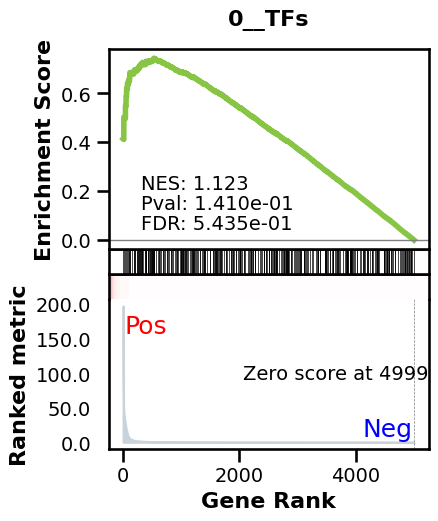

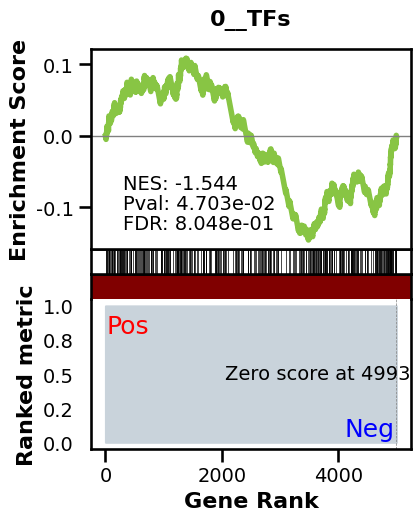

_________________________________________
TF specific enrichment


found some significant results for  36.111111111111114 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0012460602944679446 
recall:  1.0 
random precision: 0.0012464244266404952


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 57.86it/s]

  9%|▉         | 12/128 [00:00<00:01, 58.41it/s]

 14%|█▍        | 18/128 [00:00<00:01, 58.47it/s]

 19%|█▉        | 24/128 [00:00<00:01, 58.40it/s]

 23%|██▎       | 30/128 [00:00<00:01, 58.08it/s]

 28%|██▊       | 36/128 [00:00<00:01, 57.94it/s]

 33%|███▎      | 42/128 [00:00<00:01, 57.97it/s]

 38%|███▊      | 48/128 [00:00<00:01, 57.98it/s]

 42%|████▏     | 54/128 [00:00<00:01, 58.15it/s]

 47%|████▋     | 60/128 [00:01<00:01, 57.79it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 58.03it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 58.09it/s]

 61%|██████    | 78/128 [00:01<00:00, 58.19it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 58.28it/s]

 70%|███████   | 90/128 [00:01<00:00, 57.54it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 56.76it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 57.09it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 57.39it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 57.70it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 57.65it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 57.78it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 57.77it/s]

Average Precision (AP):  0.0015192777840916832
Area Under Precision-Recall Curve (AUPRC):  0.0015184143620270468


EPR: 0.5488993418929374


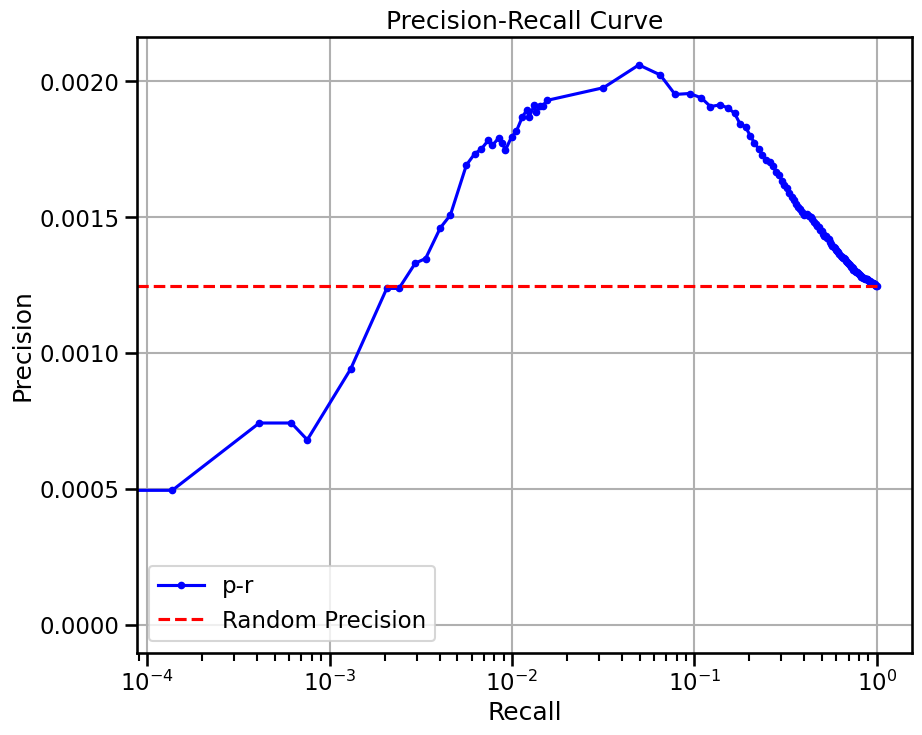

base enrichment


Top central genes: []


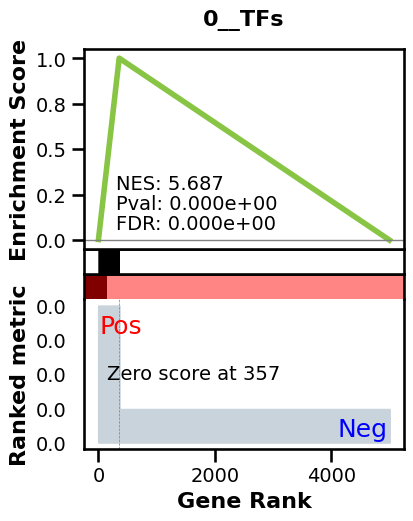

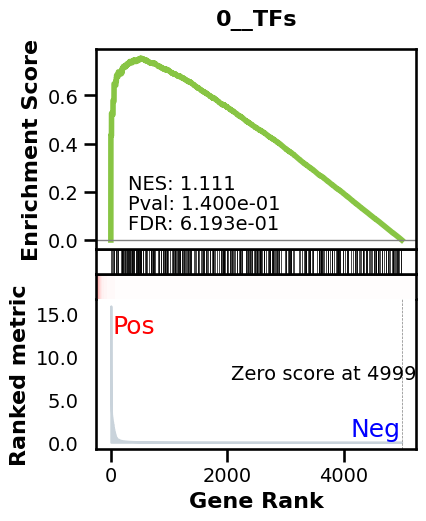

_________________________________________
TF specific enrichment


found some significant results for  16.666666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.009027741976136058 
recall:  0.6476712328767124 
random precision: 0.0012464244266404952


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 58.90it/s]

  9%|▉         | 12/128 [00:00<00:01, 59.02it/s]

 14%|█▍        | 18/128 [00:00<00:01, 58.99it/s]

 19%|█▉        | 24/128 [00:00<00:01, 59.16it/s]

 23%|██▎       | 30/128 [00:00<00:01, 59.43it/s]

 29%|██▉       | 37/128 [00:00<00:01, 59.77it/s]

 34%|███▎      | 43/128 [00:00<00:01, 59.06it/s]

 38%|███▊      | 49/128 [00:00<00:01, 59.05it/s]

 43%|████▎     | 55/128 [00:00<00:01, 59.33it/s]

 48%|████▊     | 61/128 [00:01<00:01, 59.29it/s]

 52%|█████▏    | 67/128 [00:01<00:01, 59.34it/s]

 57%|█████▋    | 73/128 [00:01<00:00, 59.35it/s]

 62%|██████▏   | 79/128 [00:01<00:00, 59.33it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 59.25it/s]

 71%|███████   | 91/128 [00:01<00:00, 59.06it/s]

 76%|███████▌  | 97/128 [00:01<00:00, 58.92it/s]

 80%|████████  | 103/128 [00:01<00:00, 59.04it/s]

 85%|████████▌ | 109/128 [00:01<00:00, 59.05it/s]

 90%|████████▉ | 115/128 [00:01<00:00, 59.26it/s]

 95%|█████████▌| 122/128 [00:02<00:00, 59.69it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.18it/s]

100%|██████████| 128/128 [00:02<00:00, 59.20it/s]

Average Precision (AP):  0.00852972022040066
Area Under Precision-Recall Curve (AUPRC):  0.008093870891582944
EPR: 13.950869909410002


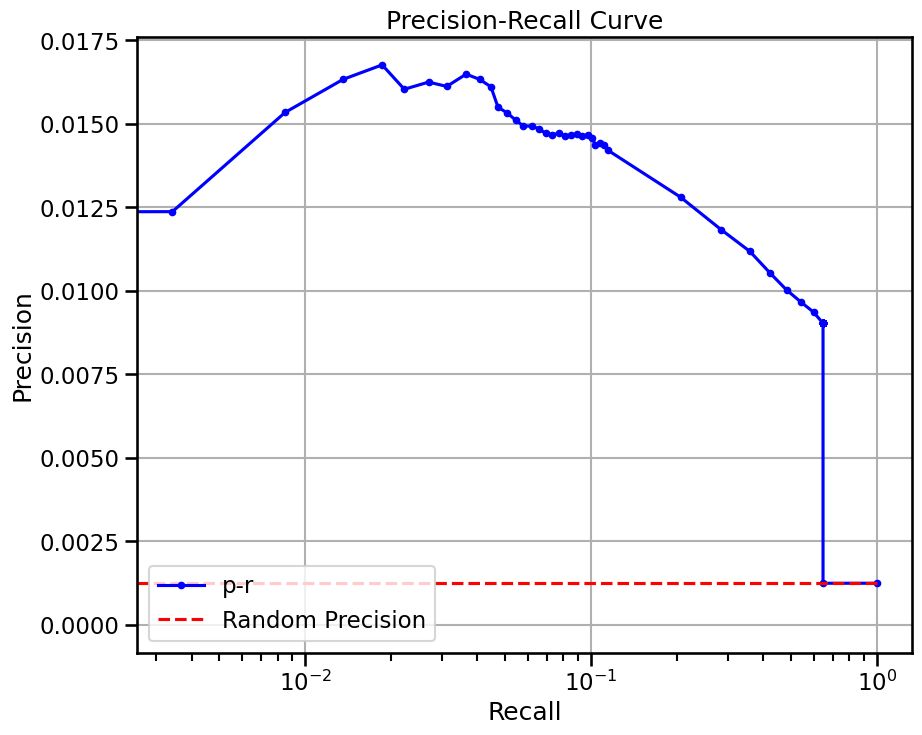

true elem 14600 ...


doing classification....


metrics {'used_heads': 7, 'precision': 0.001247767119885499, 'random_precision': 0.001247767119885499, 'recall': 1.0, 'predicted_true': 1171693.0, 'number_of_true': 1462.0}


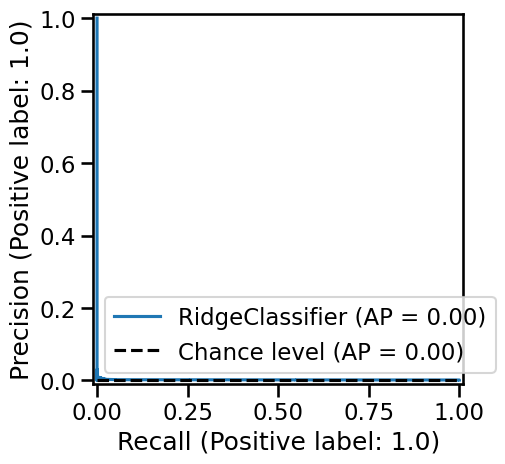

base enrichment


Top central genes: []
The DataFrame contains only the same values.


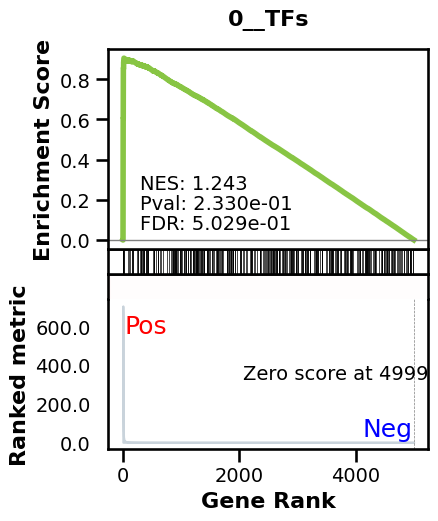

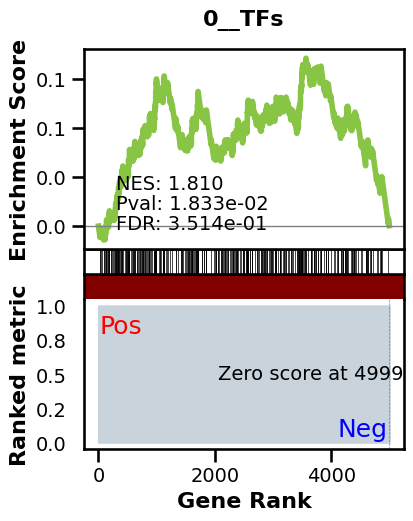

_________________________________________
TF specific enrichment


found some significant results for  30.555555555555557 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0012460602944679446 
recall:  1.0 
random precision: 0.0012464244266404952


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 57.56it/s]

  9%|▉         | 12/128 [00:00<00:02, 57.29it/s]

 14%|█▍        | 18/128 [00:00<00:01, 58.31it/s]

 20%|█▉        | 25/128 [00:00<00:01, 59.15it/s]

 25%|██▌       | 32/128 [00:00<00:01, 59.57it/s]

 30%|██▉       | 38/128 [00:00<00:01, 59.65it/s]

 35%|███▌      | 45/128 [00:00<00:01, 59.81it/s]

 40%|███▉      | 51/128 [00:00<00:01, 59.83it/s]

 45%|████▍     | 57/128 [00:00<00:01, 59.87it/s]

 50%|█████     | 64/128 [00:01<00:01, 60.04it/s]

 55%|█████▌    | 71/128 [00:01<00:00, 60.14it/s]

 61%|██████    | 78/128 [00:01<00:00, 60.08it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 60.01it/s]

 72%|███████▏  | 92/128 [00:01<00:00, 59.67it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 59.55it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 59.46it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 59.47it/s]

 91%|█████████ | 116/128 [00:01<00:00, 59.46it/s]

 95%|█████████▌| 122/128 [00:02<00:00, 59.39it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:02<00:00, 59.51it/s]

100%|██████████| 128/128 [00:02<00:00, 59.52it/s]

Average Precision (AP):  0.0018608739319503445
Area Under Precision-Recall Curve (AUPRC):  0.0018554466404801626
EPR: 7.823472774611702


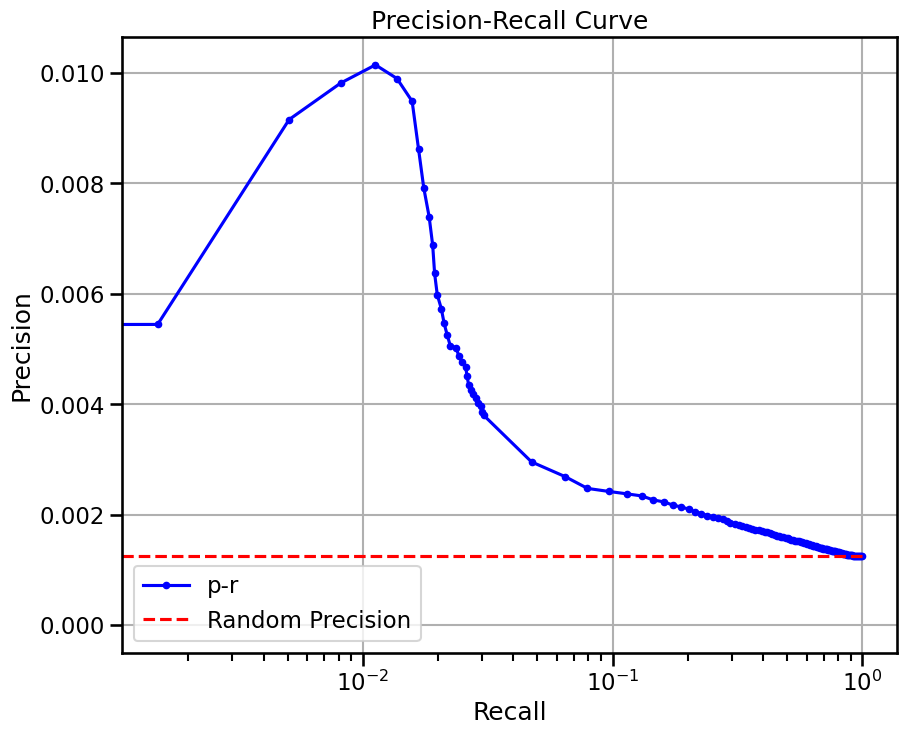

base enrichment


Top central genes: []


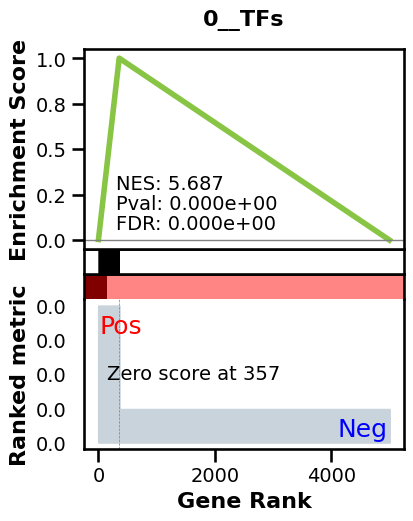

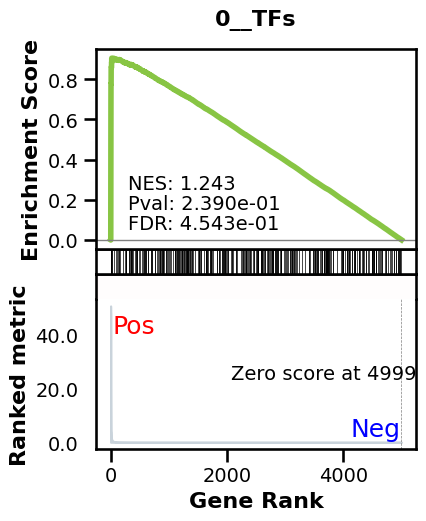

_________________________________________
TF specific enrichment


found some significant results for  5.555555555555555 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.009027741976136058 
recall:  0.6476712328767124 
random precision: 0.0012464244266404952


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 58.44it/s]

  9%|▉         | 12/128 [00:00<00:01, 58.34it/s]

 14%|█▍        | 18/128 [00:00<00:01, 58.44it/s]

 19%|█▉        | 24/128 [00:00<00:01, 59.03it/s]

 23%|██▎       | 30/128 [00:00<00:01, 59.09it/s]

 28%|██▊       | 36/128 [00:00<00:01, 59.10it/s]

 33%|███▎      | 42/128 [00:00<00:01, 59.04it/s]

 38%|███▊      | 48/128 [00:00<00:01, 58.89it/s]

 42%|████▏     | 54/128 [00:00<00:01, 58.70it/s]

 47%|████▋     | 60/128 [00:01<00:01, 58.72it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 58.78it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 58.80it/s]

 61%|██████    | 78/128 [00:01<00:00, 58.89it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 58.98it/s]

 70%|███████   | 90/128 [00:01<00:00, 58.74it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 58.60it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 58.46it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 58.52it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 58.63it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 58.79it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 58.81it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 58.74it/s]

Average Precision (AP):  0.010086758383422422
Area Under Precision-Recall Curve (AUPRC):  0.009150255933972312
EPR: 21.2898286566423


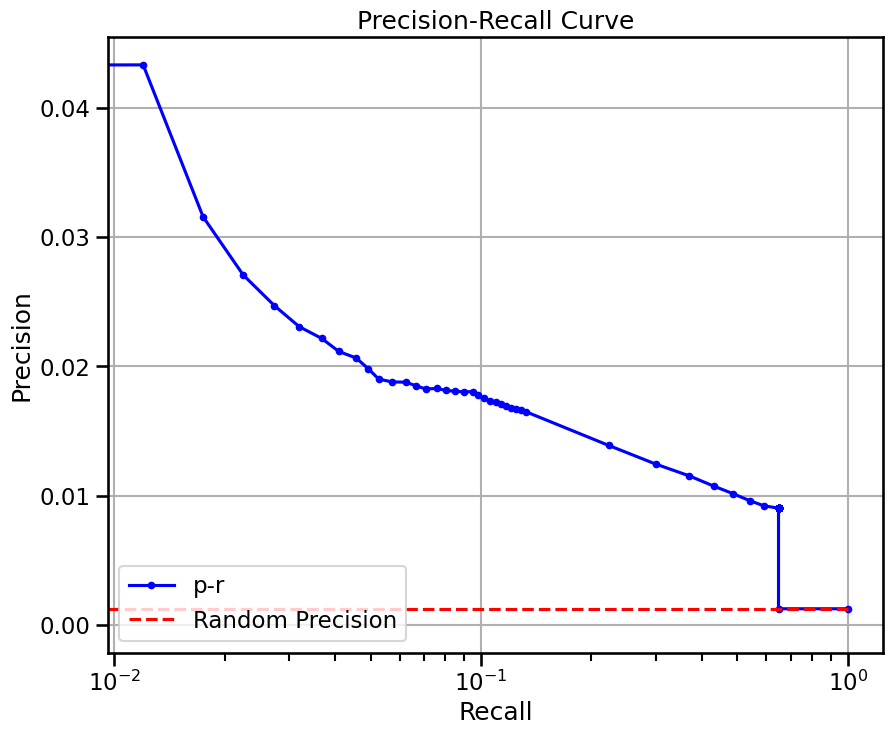

  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:02<02:15,  2.77s/it]

  4%|▍         | 2/50 [00:04<01:36,  2.00s/it]

  6%|▌         | 3/50 [00:05<01:21,  1.73s/it]

  8%|▊         | 4/50 [00:07<01:13,  1.60s/it]

 10%|█         | 5/50 [00:08<01:09,  1.53s/it]

 12%|█▏        | 6/50 [00:09<01:06,  1.50s/it]

 14%|█▍        | 7/50 [00:12<01:15,  1.77s/it]

 16%|█▌        | 8/50 [00:13<01:08,  1.62s/it]

 18%|█▊        | 9/50 [00:14<01:02,  1.53s/it]

 20%|██        | 10/50 [00:16<00:58,  1.45s/it]

 22%|██▏       | 11/50 [00:17<00:55,  1.41s/it]

 24%|██▍       | 12/50 [00:18<00:52,  1.38s/it]

 26%|██▌       | 13/50 [00:20<00:50,  1.36s/it]

 28%|██▊       | 14/50 [00:21<00:48,  1.34s/it]

 30%|███       | 15/50 [00:23<00:54,  1.56s/it]

 32%|███▏      | 16/50 [00:24<00:51,  1.52s/it]

 34%|███▍      | 17/50 [00:26<00:48,  1.48s/it]

 36%|███▌      | 18/50 [00:27<00:47,  1.48s/it]

 38%|███▊      | 19/50 [00:29<00:44,  1.43s/it]

 40%|████      | 20/50 [00:30<00:41,  1.39s/it]

 42%|████▏     | 21/50 [00:31<00:39,  1.37s/it]

 44%|████▍     | 22/50 [00:32<00:37,  1.35s/it]

 46%|████▌     | 23/50 [00:38<01:08,  2.54s/it]

 48%|████▊     | 24/50 [00:39<00:56,  2.18s/it]

 50%|█████     | 25/50 [00:40<00:48,  1.93s/it]

 52%|█████▏    | 26/50 [00:42<00:42,  1.75s/it]

 54%|█████▍    | 27/50 [00:43<00:37,  1.63s/it]

 56%|█████▌    | 28/50 [00:45<00:34,  1.56s/it]

 58%|█████▊    | 29/50 [00:46<00:31,  1.50s/it]

 60%|██████    | 30/50 [00:49<00:40,  2.00s/it]

 62%|██████▏   | 31/50 [00:51<00:36,  1.94s/it]

 64%|██████▍   | 32/50 [00:52<00:33,  1.84s/it]

 66%|██████▌   | 33/50 [00:54<00:28,  1.70s/it]

 68%|██████▊   | 34/50 [00:55<00:25,  1.60s/it]

 70%|███████   | 35/50 [00:57<00:22,  1.53s/it]

 72%|███████▏  | 36/50 [00:58<00:21,  1.51s/it]

 74%|███████▍  | 37/50 [01:00<00:19,  1.50s/it]

 76%|███████▌  | 38/50 [01:01<00:17,  1.46s/it]

 78%|███████▊  | 39/50 [01:03<00:16,  1.53s/it]

 80%|████████  | 40/50 [01:04<00:14,  1.46s/it]

 82%|████████▏ | 41/50 [01:05<00:12,  1.42s/it]

 84%|████████▍ | 42/50 [01:07<00:11,  1.39s/it]

 86%|████████▌ | 43/50 [01:08<00:09,  1.37s/it]

 88%|████████▊ | 44/50 [01:09<00:08,  1.36s/it]

 90%|█████████ | 45/50 [01:11<00:08,  1.62s/it]

 92%|█████████▏| 46/50 [01:13<00:06,  1.58s/it]

 94%|█████████▍| 47/50 [01:14<00:04,  1.51s/it]

 96%|█████████▌| 48/50 [01:16<00:02,  1.46s/it]

 98%|█████████▊| 49/50 [01:17<00:01,  1.42s/it]

100%|██████████| 50/50 [01:18<00:00,  1.20s/it]

100%|██████████| 50/50 [01:18<00:00,  1.57s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


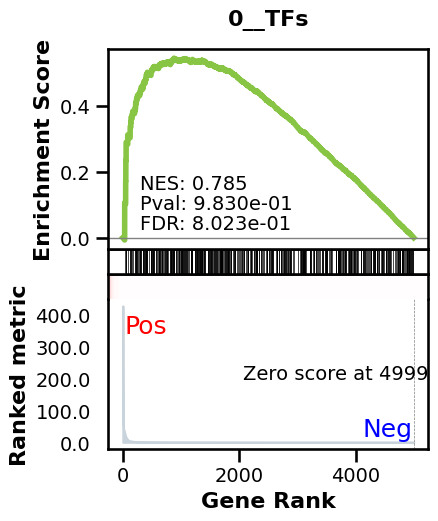

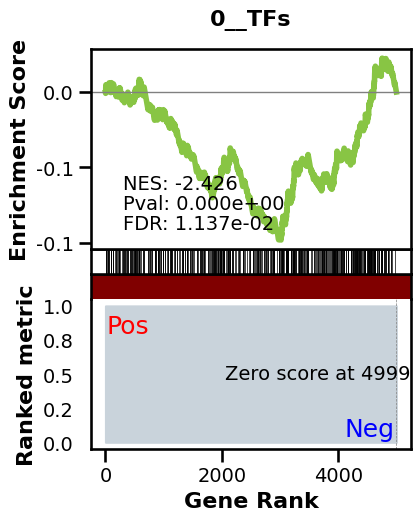

_________________________________________
TF specific enrichment


found some significant results for  21.428571428571427 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.0015901492455931698 
recall:  1.0 
random precision: 0.0015905976802365973


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 47.41it/s]

  8%|▊         | 10/128 [00:00<00:02, 47.53it/s]

 12%|█▏        | 15/128 [00:00<00:02, 47.63it/s]

 16%|█▌        | 20/128 [00:00<00:02, 47.61it/s]

 20%|█▉        | 25/128 [00:00<00:02, 47.42it/s]

 23%|██▎       | 30/128 [00:00<00:02, 47.17it/s]

 27%|██▋       | 35/128 [00:00<00:01, 47.02it/s]

 31%|███▏      | 40/128 [00:00<00:01, 47.20it/s]

 35%|███▌      | 45/128 [00:00<00:01, 47.42it/s]

 39%|███▉      | 50/128 [00:01<00:01, 47.57it/s]

 43%|████▎     | 55/128 [00:01<00:01, 47.70it/s]

 47%|████▋     | 60/128 [00:01<00:01, 47.55it/s]

 51%|█████     | 65/128 [00:01<00:01, 47.42it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 47.02it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 47.15it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 47.31it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 47.44it/s]

 70%|███████   | 90/128 [00:01<00:00, 47.58it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 47.48it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 47.22it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 47.03it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 46.80it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 47.08it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 47.30it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 47.42it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 47.32it/s]

Average Precision (AP):  0.0017632374715720563
Area Under Precision-Recall Curve (AUPRC):  0.0017624301181962806
EPR: 1.2264686850998343


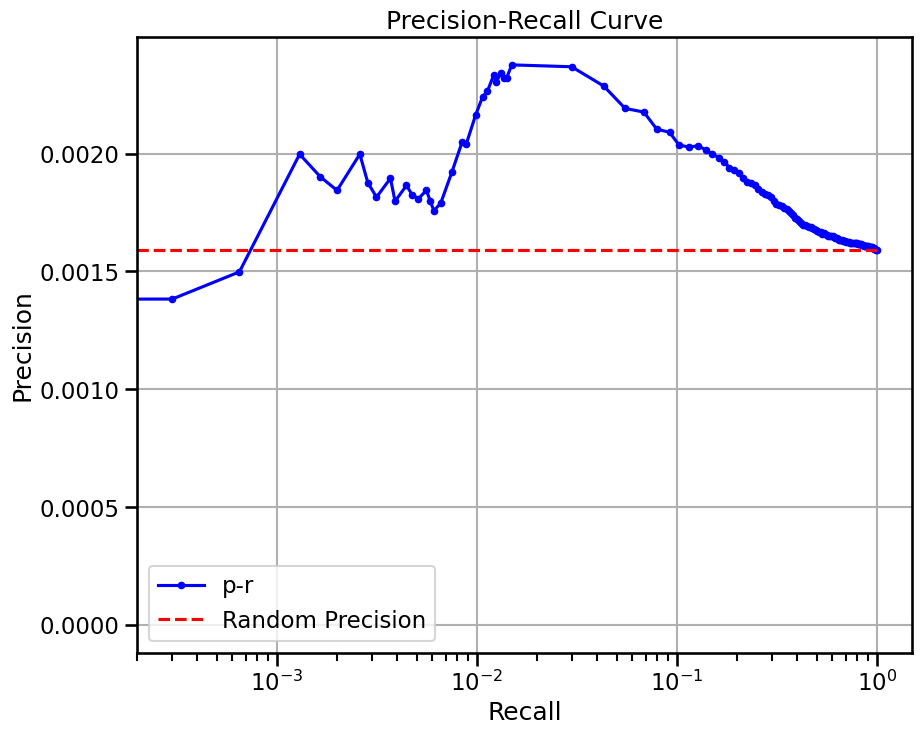

base enrichment


Top central genes: []


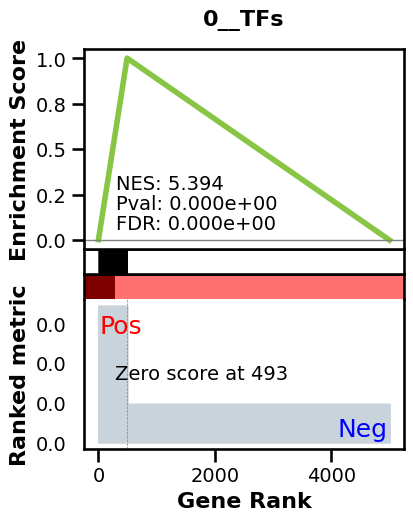

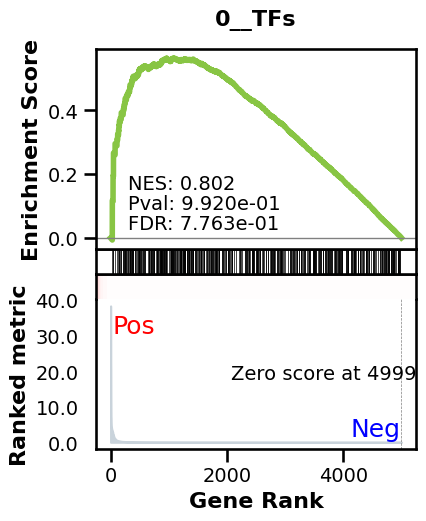

_________________________________________
TF specific enrichment


found some significant results for  12.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.006406149061914498 
recall:  0.48725382385284416 
random precision: 0.0015905976802365973


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.82it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.81it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.55it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.42it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.35it/s]

 28%|██▊       | 36/128 [00:00<00:01, 54.49it/s]

 33%|███▎      | 42/128 [00:00<00:01, 54.61it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.64it/s]

 42%|████▏     | 54/128 [00:00<00:01, 54.62it/s]

 47%|████▋     | 60/128 [00:01<00:01, 54.45it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 54.40it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.33it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.44it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 54.56it/s]

 70%|███████   | 90/128 [00:01<00:00, 54.61it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 54.60it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 54.48it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 54.42it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 54.47it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 54.61it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 54.60it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.50it/s]

Average Precision (AP):  0.00490900382815734
Area Under Precision-Recall Curve (AUPRC):  0.004525645170550714
EPR: 8.22869139176414


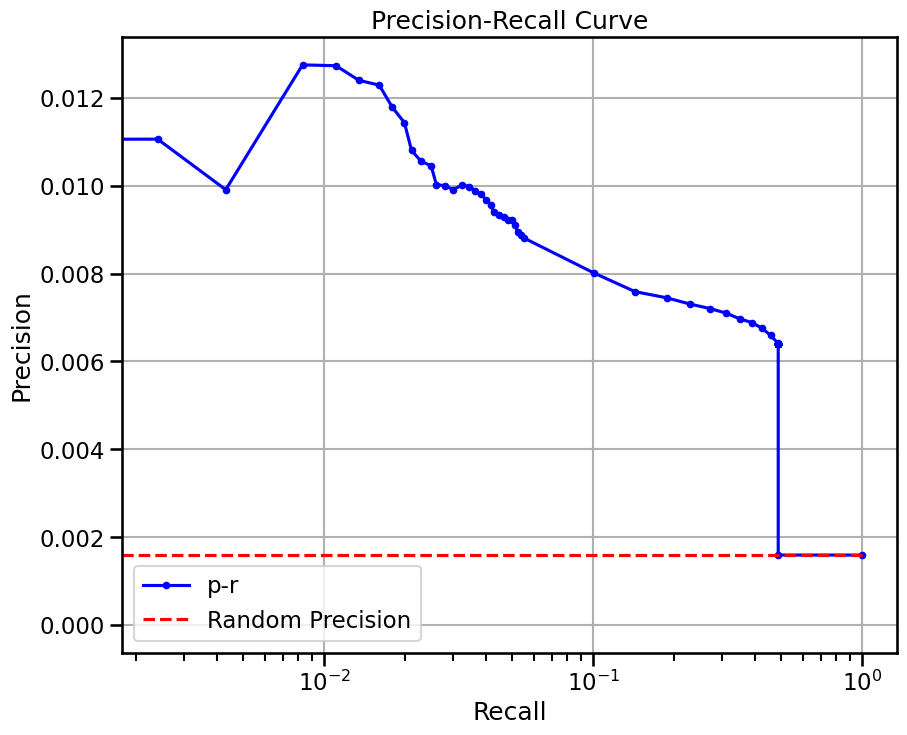

base enrichment


Top central genes: []
The DataFrame contains only the same values.


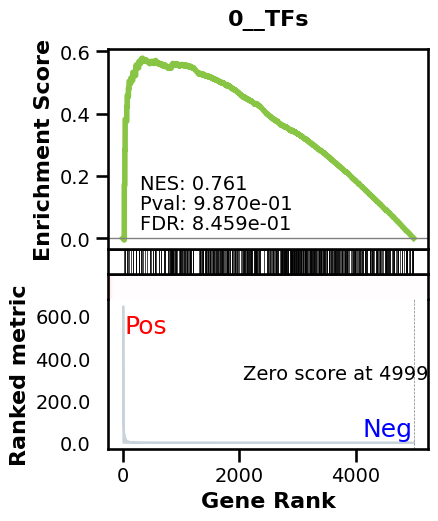

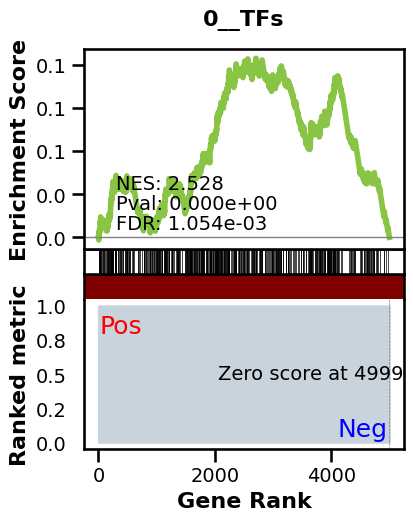

_________________________________________
TF specific enrichment


found some significant results for  35.714285714285715 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.0015901492455931698 
recall:  1.0 
random precision: 0.0015905976802365973


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 52.31it/s]

  9%|▉         | 12/128 [00:00<00:02, 52.49it/s]

 14%|█▍        | 18/128 [00:00<00:02, 52.29it/s]

 19%|█▉        | 24/128 [00:00<00:01, 52.22it/s]

 23%|██▎       | 30/128 [00:00<00:01, 52.41it/s]

 28%|██▊       | 36/128 [00:00<00:01, 52.34it/s]

 33%|███▎      | 42/128 [00:00<00:01, 52.44it/s]

 38%|███▊      | 48/128 [00:00<00:01, 52.35it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.36it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.21it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.05it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.08it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.15it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.19it/s]

 70%|███████   | 90/128 [00:01<00:00, 52.23it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 52.11it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.17it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.30it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.32it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.22it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 52.29it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 52.23it/s]

Average Precision (AP):  0.0019679410126992487
Area Under Precision-Recall Curve (AUPRC):  0.0019660675558640277
EPR: 2.0811915586277387


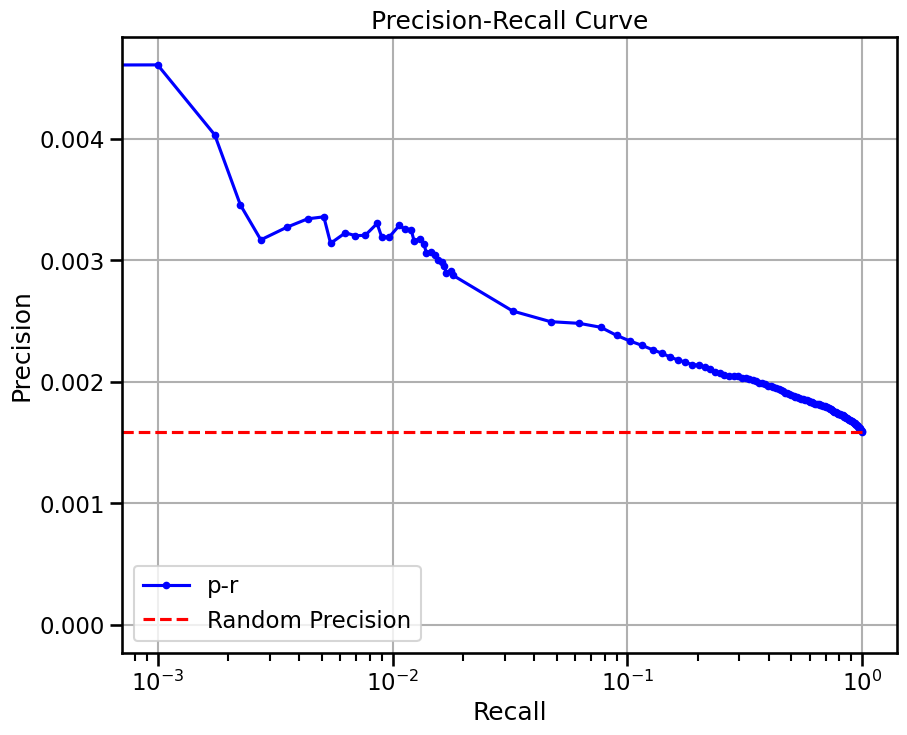

base enrichment


Top central genes: []


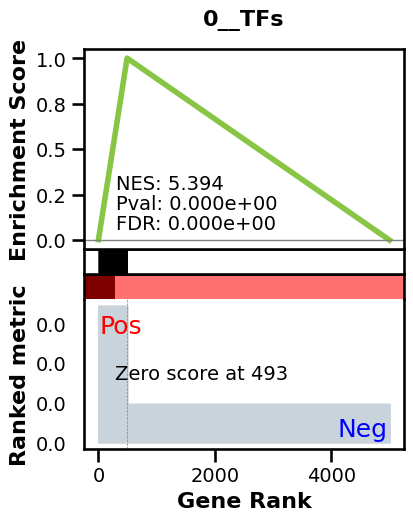

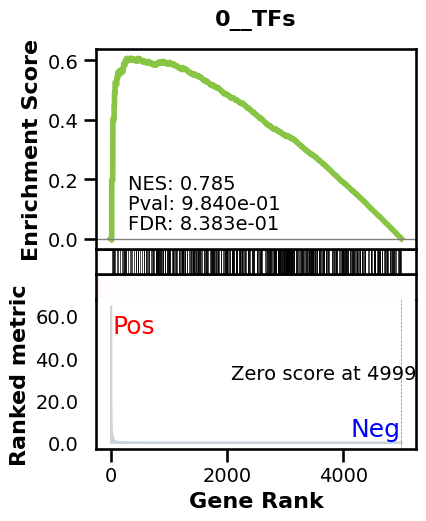

_________________________________________
TF specific enrichment


found some significant results for  8.928571428571429 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.006406149061914498 
recall:  0.48725382385284416 
random precision: 0.0015905976802365973


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 51.31it/s]

  9%|▉         | 12/128 [00:00<00:02, 51.49it/s]

 14%|█▍        | 18/128 [00:00<00:02, 51.72it/s]

 19%|█▉        | 24/128 [00:00<00:01, 52.09it/s]

 23%|██▎       | 30/128 [00:00<00:01, 52.14it/s]

 28%|██▊       | 36/128 [00:00<00:01, 52.10it/s]

 33%|███▎      | 42/128 [00:00<00:01, 52.20it/s]

 38%|███▊      | 48/128 [00:00<00:01, 52.23it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.35it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.41it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.51it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.36it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.35it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.12it/s]

 70%|███████   | 90/128 [00:01<00:00, 52.05it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 51.87it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.38it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.25it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 51.92it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.28it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 52.44it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 52.17it/s]

Average Precision (AP):  0.005323925657204904
Area Under Precision-Recall Curve (AUPRC):  0.00489491018267124
EPR: 8.195717445191981


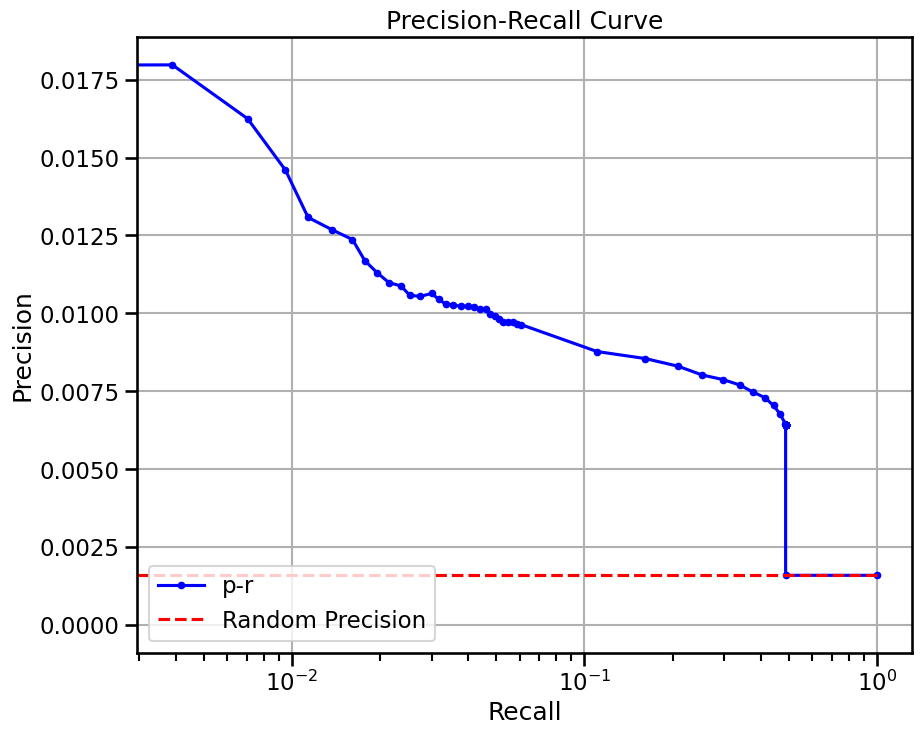

  0%|          | 0/44 [00:00<?, ?it/s]

  2%|▏         | 1/44 [00:03<02:46,  3.86s/it]

  5%|▍         | 2/44 [00:05<01:43,  2.46s/it]

  7%|▋         | 3/44 [00:09<02:21,  3.46s/it]

  9%|▉         | 4/44 [00:11<01:48,  2.71s/it]

 11%|█▏        | 5/44 [00:14<01:45,  2.70s/it]

 14%|█▎        | 6/44 [00:15<01:28,  2.34s/it]

 16%|█▌        | 7/44 [00:17<01:19,  2.14s/it]

 18%|█▊        | 8/44 [00:19<01:14,  2.06s/it]

 20%|██        | 9/44 [00:21<01:15,  2.16s/it]

 23%|██▎       | 10/44 [00:24<01:13,  2.16s/it]

 25%|██▌       | 11/44 [00:26<01:15,  2.29s/it]

 27%|██▋       | 12/44 [00:29<01:19,  2.49s/it]

 30%|██▉       | 13/44 [00:31<01:07,  2.19s/it]

 32%|███▏      | 14/44 [00:32<00:59,  1.98s/it]

 34%|███▍      | 15/44 [00:34<00:53,  1.83s/it]

 36%|███▋      | 16/44 [00:35<00:48,  1.74s/it]

 39%|███▊      | 17/44 [00:38<00:53,  1.98s/it]

 41%|████      | 18/44 [00:40<00:53,  2.07s/it]

 43%|████▎     | 19/44 [00:41<00:47,  1.88s/it]

 45%|████▌     | 20/44 [00:43<00:41,  1.75s/it]

 48%|████▊     | 21/44 [00:45<00:40,  1.76s/it]

 50%|█████     | 22/44 [00:46<00:36,  1.64s/it]

 52%|█████▏    | 23/44 [00:48<00:38,  1.83s/it]

 55%|█████▍    | 24/44 [00:50<00:33,  1.68s/it]

 57%|█████▋    | 25/44 [00:51<00:29,  1.58s/it]

 59%|█████▉    | 26/44 [00:52<00:27,  1.51s/it]

 61%|██████▏   | 27/44 [00:54<00:25,  1.52s/it]

 64%|██████▎   | 28/44 [00:55<00:23,  1.44s/it]

 66%|██████▌   | 29/44 [00:56<00:21,  1.41s/it]

 68%|██████▊   | 30/44 [00:58<00:19,  1.41s/it]

 70%|███████   | 31/44 [00:59<00:18,  1.40s/it]

 73%|███████▎  | 32/44 [01:01<00:20,  1.69s/it]

 75%|███████▌  | 33/44 [01:03<00:17,  1.63s/it]

 77%|███████▋  | 34/44 [01:06<00:19,  1.91s/it]

 80%|███████▉  | 35/44 [01:07<00:16,  1.79s/it]

 82%|████████▏ | 36/44 [01:09<00:13,  1.71s/it]

 84%|████████▍ | 37/44 [01:10<00:12,  1.77s/it]

 86%|████████▋ | 38/44 [01:12<00:10,  1.72s/it]

 89%|████████▊ | 39/44 [01:14<00:09,  1.84s/it]

 91%|█████████ | 40/44 [01:16<00:06,  1.74s/it]

 93%|█████████▎| 41/44 [01:17<00:05,  1.68s/it]

 95%|█████████▌| 42/44 [01:19<00:03,  1.67s/it]

 98%|█████████▊| 43/44 [01:20<00:01,  1.60s/it]

100%|██████████| 44/44 [01:21<00:00,  1.18s/it]

100%|██████████| 44/44 [01:21<00:00,  1.85s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


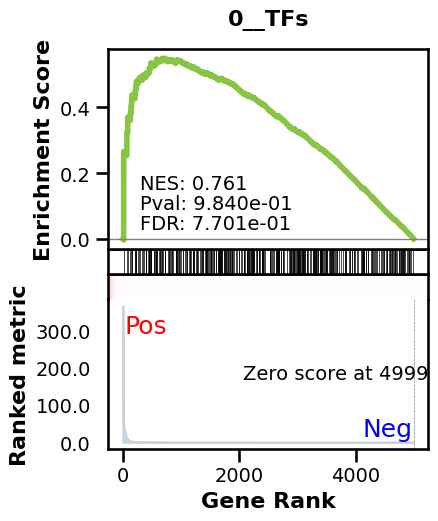

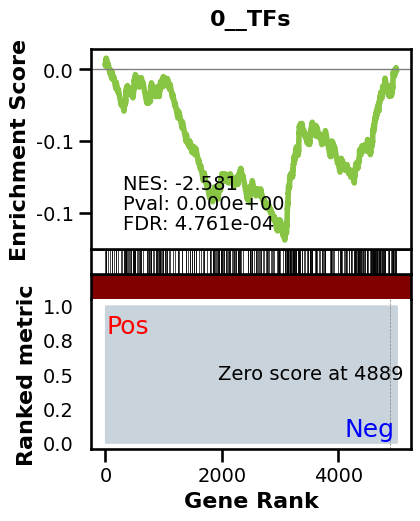

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0008040620608093005 
recall:  1.0 
random precision: 0.0008042949872463833


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 58.05it/s]

  9%|▉         | 12/128 [00:00<00:02, 57.77it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.88it/s]

 19%|█▉        | 24/128 [00:00<00:02, 51.69it/s]

 23%|██▎       | 30/128 [00:00<00:01, 49.68it/s]

 28%|██▊       | 36/128 [00:00<00:01, 48.71it/s]

 32%|███▏      | 41/128 [00:00<00:01, 48.42it/s]

 37%|███▋      | 47/128 [00:00<00:01, 49.26it/s]

 41%|████▏     | 53/128 [00:01<00:01, 50.05it/s]

 46%|████▌     | 59/128 [00:01<00:01, 50.28it/s]

 51%|█████     | 65/128 [00:01<00:01, 50.60it/s]

 55%|█████▌    | 71/128 [00:01<00:01, 50.55it/s]

 60%|██████    | 77/128 [00:01<00:01, 50.10it/s]

 65%|██████▍   | 83/128 [00:01<00:00, 49.07it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 48.58it/s]

 73%|███████▎  | 93/128 [00:01<00:00, 48.28it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 48.05it/s]

 80%|████████  | 103/128 [00:02<00:00, 47.96it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 47.82it/s]

 88%|████████▊ | 113/128 [00:02<00:00, 47.76it/s]

 92%|█████████▏| 118/128 [00:02<00:00, 47.77it/s]

 96%|█████████▌| 123/128 [00:02<00:00, 47.73it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:02<00:00, 47.62it/s]

100%|██████████| 128/128 [00:02<00:00, 49.30it/s]

Average Precision (AP):  0.0009211435611214878
Area Under Precision-Recall Curve (AUPRC):  0.0009199866638812779
EPR: 1.297506646637795


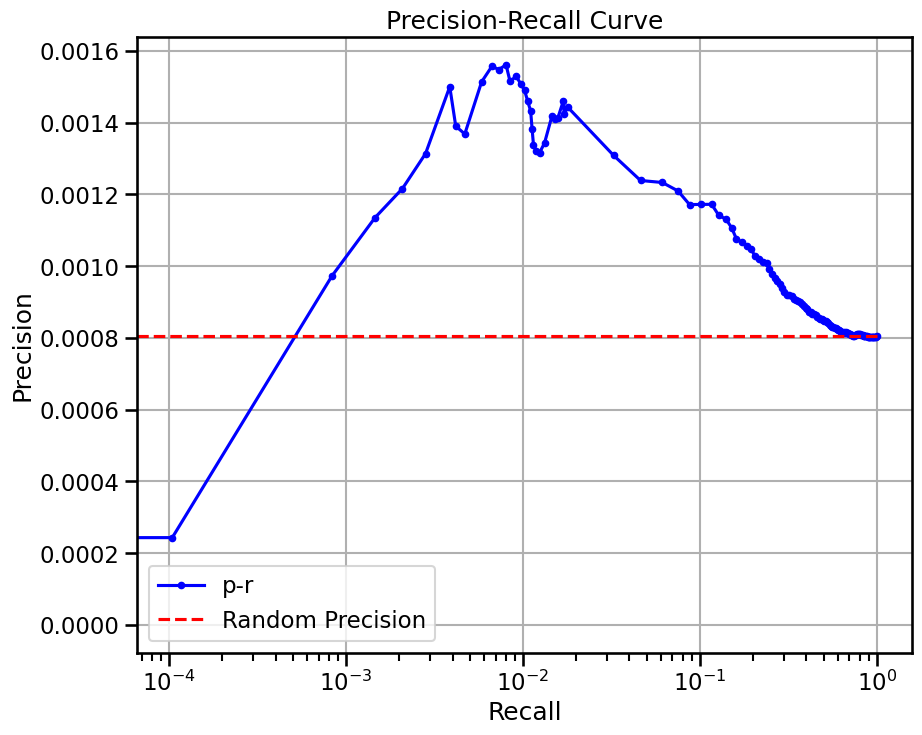

base enrichment


Top central genes: []


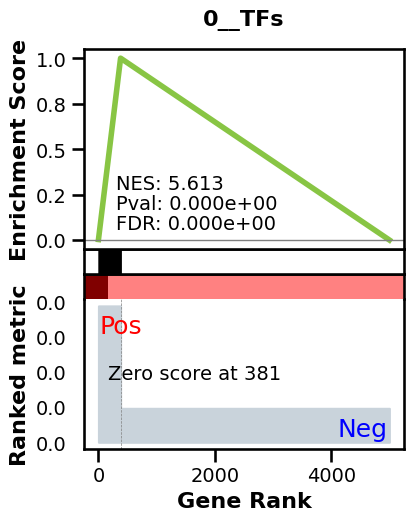

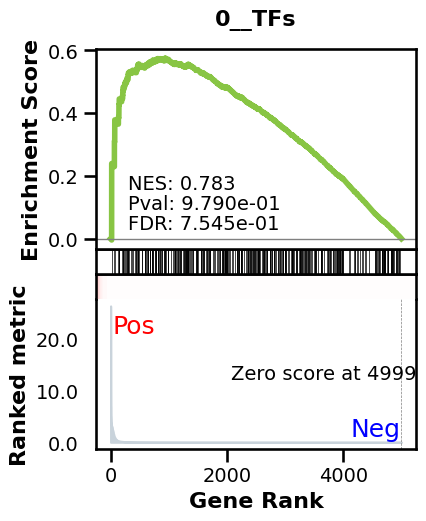

_________________________________________
TF specific enrichment


found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0032449520061130707 
recall:  0.3880254511317409 
random precision: 0.0008042949872463833


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 58.45it/s]

  9%|▉         | 12/128 [00:00<00:01, 58.49it/s]

 14%|█▍        | 18/128 [00:00<00:01, 58.73it/s]

 19%|█▉        | 24/128 [00:00<00:01, 58.61it/s]

 23%|██▎       | 30/128 [00:00<00:01, 58.82it/s]

 28%|██▊       | 36/128 [00:00<00:01, 58.65it/s]

 33%|███▎      | 42/128 [00:00<00:01, 58.71it/s]

 38%|███▊      | 48/128 [00:00<00:01, 58.63it/s]

 42%|████▏     | 54/128 [00:00<00:01, 58.73it/s]

 47%|████▋     | 60/128 [00:01<00:01, 58.74it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 58.25it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 58.11it/s]

 61%|██████    | 78/128 [00:01<00:00, 57.87it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 57.63it/s]

 70%|███████   | 90/128 [00:01<00:00, 57.45it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 57.48it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 57.60it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 57.62it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 57.66it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 57.58it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 57.77it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 58.07it/s]

Average Precision (AP):  0.002263360341484988
Area Under Precision-Recall Curve (AUPRC):  0.0020001562089462183
EPR: 7.071389276242374


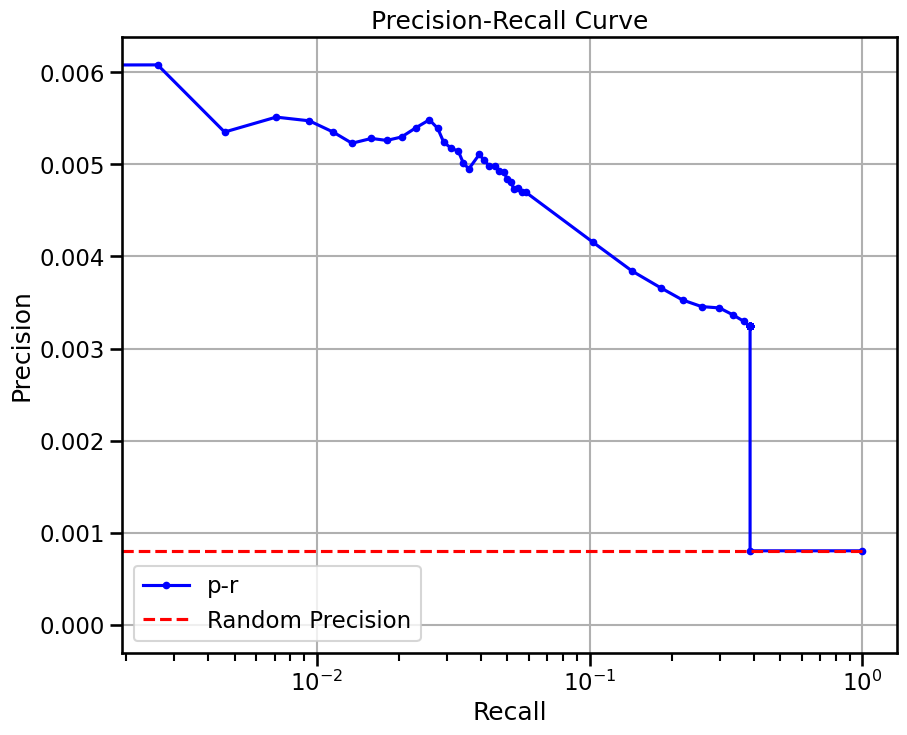

base enrichment


Top central genes: []
The DataFrame contains only the same values.


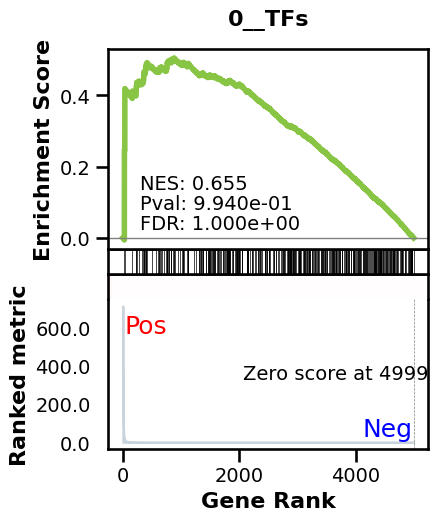

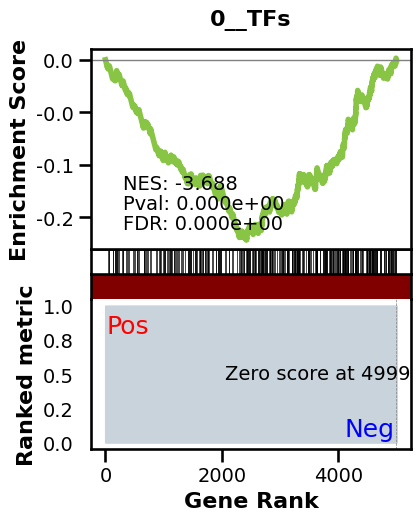

_________________________________________
TF specific enrichment


found some significant results for  14.285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0008040620608093005 
recall:  1.0 
random precision: 0.0008042949872463833


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 50.73it/s]

  9%|▉         | 12/128 [00:00<00:02, 48.42it/s]

 13%|█▎        | 17/128 [00:00<00:02, 48.59it/s]

 17%|█▋        | 22/128 [00:00<00:02, 48.52it/s]

 21%|██        | 27/128 [00:00<00:02, 48.62it/s]

 25%|██▌       | 32/128 [00:00<00:01, 48.49it/s]

 29%|██▉       | 37/128 [00:00<00:01, 48.39it/s]

 33%|███▎      | 42/128 [00:00<00:01, 48.04it/s]

 37%|███▋      | 47/128 [00:00<00:01, 47.77it/s]

 41%|████      | 52/128 [00:01<00:01, 47.83it/s]

 45%|████▍     | 57/128 [00:01<00:01, 48.14it/s]

 48%|████▊     | 62/128 [00:01<00:01, 48.34it/s]

 52%|█████▏    | 67/128 [00:01<00:01, 48.48it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 48.56it/s]

 60%|██████    | 77/128 [00:01<00:01, 48.29it/s]

 64%|██████▍   | 82/128 [00:01<00:00, 47.88it/s]

 68%|██████▊   | 87/128 [00:01<00:00, 47.58it/s]

 72%|███████▏  | 92/128 [00:01<00:00, 47.78it/s]

 76%|███████▌  | 97/128 [00:02<00:00, 48.00it/s]

 80%|███████▉  | 102/128 [00:02<00:00, 47.90it/s]

 84%|████████▎ | 107/128 [00:02<00:00, 47.83it/s]

 88%|████████▊ | 112/128 [00:02<00:00, 47.63it/s]

 91%|█████████▏| 117/128 [00:02<00:00, 46.33it/s]

 95%|█████████▌| 122/128 [00:02<00:00, 45.73it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 48.15it/s]

100%|██████████| 128/128 [00:02<00:00, 47.98it/s]

Average Precision (AP):  0.0009241902499891713
Area Under Precision-Recall Curve (AUPRC):  0.0009217782118768768
EPR: 3.777749919534008


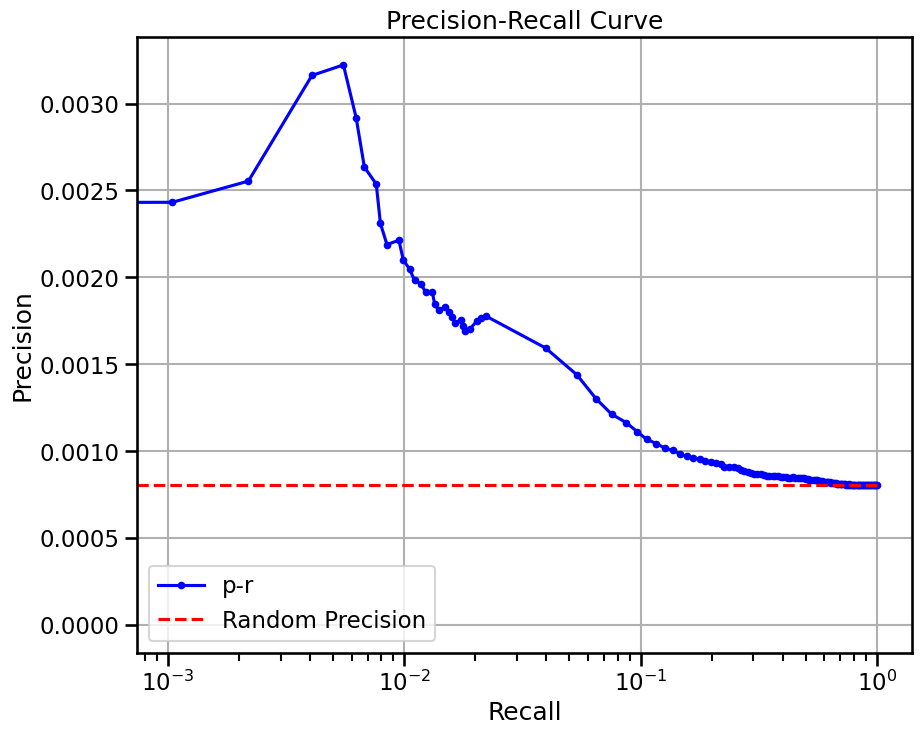

base enrichment


Top central genes: []


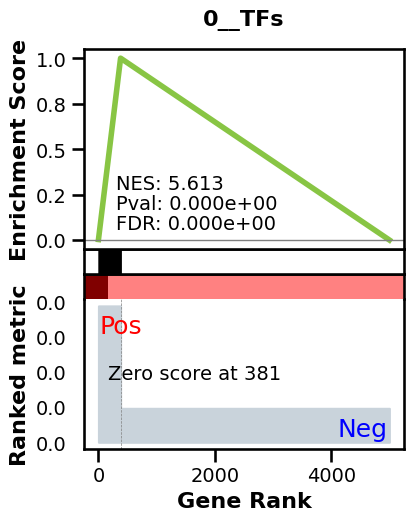

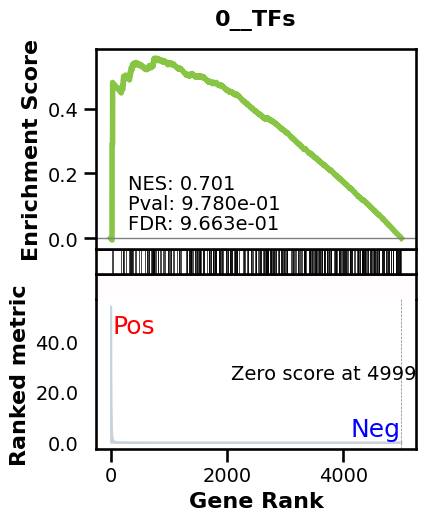

_________________________________________
TF specific enrichment


found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0032449520061130707 
recall:  0.3880254511317409 
random precision: 0.0008042949872463833


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 58.45it/s]

  9%|▉         | 12/128 [00:00<00:01, 58.44it/s]

 14%|█▍        | 18/128 [00:00<00:01, 58.57it/s]

 19%|█▉        | 24/128 [00:00<00:01, 58.56it/s]

 23%|██▎       | 30/128 [00:00<00:01, 58.69it/s]

 28%|██▊       | 36/128 [00:00<00:01, 58.69it/s]

 33%|███▎      | 42/128 [00:00<00:01, 58.75it/s]

 38%|███▊      | 48/128 [00:00<00:01, 58.79it/s]

 42%|████▏     | 54/128 [00:00<00:01, 58.79it/s]

 47%|████▋     | 60/128 [00:01<00:01, 58.85it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 58.86it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 58.82it/s]

 61%|██████    | 78/128 [00:01<00:00, 58.83it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 58.86it/s]

 70%|███████   | 90/128 [00:01<00:00, 58.86it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 58.79it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 58.79it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 58.72it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 58.62it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 58.70it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 58.73it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 58.71it/s]

Average Precision (AP):  0.0021430632436002404
Area Under Precision-Recall Curve (AUPRC):  0.0018751628419899987
EPR: 7.601576272005322


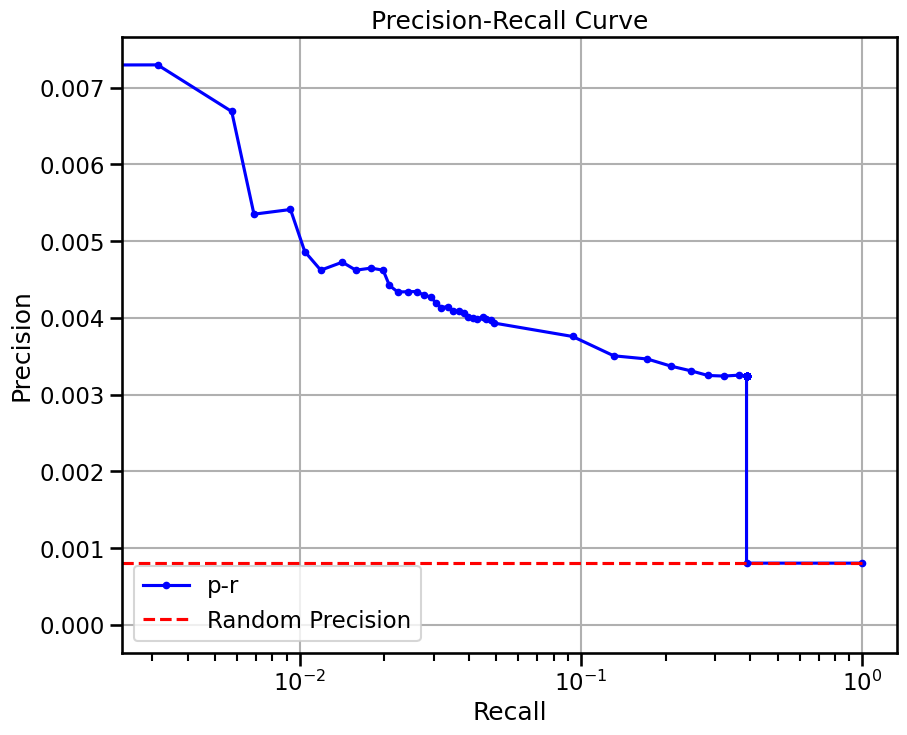

  0%|          | 0/24 [00:00<?, ?it/s]

  4%|▍         | 1/24 [00:02<00:55,  2.42s/it]

  8%|▊         | 2/24 [00:03<00:42,  1.92s/it]

 12%|█▎        | 3/24 [00:05<00:36,  1.74s/it]

 17%|█▋        | 4/24 [00:07<00:33,  1.68s/it]

 21%|██        | 5/24 [00:08<00:30,  1.60s/it]

 25%|██▌       | 6/24 [00:10<00:29,  1.63s/it]

 29%|██▉       | 7/24 [00:11<00:26,  1.58s/it]

 33%|███▎      | 8/24 [00:13<00:24,  1.53s/it]

 38%|███▊      | 9/24 [00:14<00:22,  1.50s/it]

 42%|████▏     | 10/24 [00:16<00:20,  1.49s/it]

 46%|████▌     | 11/24 [00:17<00:19,  1.50s/it]

 50%|█████     | 12/24 [00:19<00:18,  1.55s/it]

 54%|█████▍    | 13/24 [00:20<00:16,  1.49s/it]

 58%|█████▊    | 14/24 [00:21<00:14,  1.45s/it]

 62%|██████▎   | 15/24 [00:23<00:12,  1.42s/it]

 67%|██████▋   | 16/24 [00:24<00:11,  1.39s/it]

 71%|███████   | 17/24 [00:26<00:09,  1.38s/it]

 75%|███████▌  | 18/24 [00:27<00:08,  1.38s/it]

 79%|███████▉  | 19/24 [00:28<00:07,  1.40s/it]

 83%|████████▎ | 20/24 [00:30<00:05,  1.41s/it]

 88%|████████▊ | 21/24 [00:31<00:04,  1.41s/it]

 92%|█████████▏| 22/24 [00:33<00:02,  1.39s/it]

 96%|█████████▌| 23/24 [00:34<00:01,  1.39s/it]

100%|██████████| 24/24 [00:35<00:00,  1.26s/it]

100%|██████████| 24/24 [00:35<00:00,  1.48s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


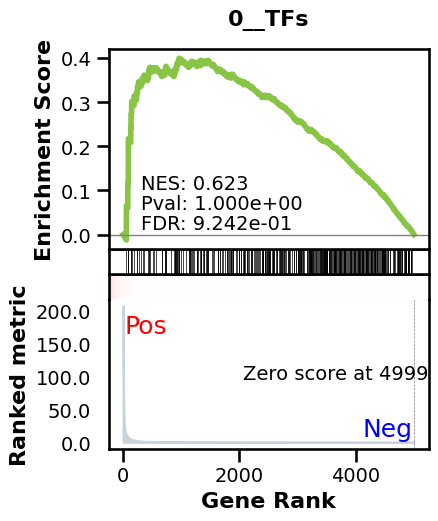

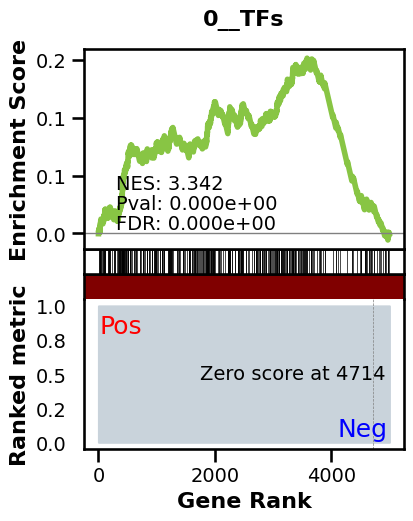

_________________________________________
TF specific enrichment


found some significant results for  33.333333333333336 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2738 genes
intersection pct: 0.5476
precision:  0.0005733902527305975 
recall:  1.0 
random precision: 0.0005735728610913398


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 73.09it/s]

 12%|█▎        | 16/128 [00:00<00:01, 73.28it/s]

 19%|█▉        | 24/128 [00:00<00:01, 73.35it/s]

 25%|██▌       | 32/128 [00:00<00:01, 73.18it/s]

 31%|███▏      | 40/128 [00:00<00:01, 72.99it/s]

 38%|███▊      | 48/128 [00:00<00:01, 72.82it/s]

 44%|████▍     | 56/128 [00:00<00:00, 72.85it/s]

 50%|█████     | 64/128 [00:00<00:00, 72.88it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 73.04it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 72.78it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 72.93it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 72.92it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 72.90it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 72.94it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 73.05it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 72.57it/s]

100%|██████████| 128/128 [00:01<00:00, 72.85it/s]

Average Precision (AP):  0.0006303958000448767
Area Under Precision-Recall Curve (AUPRC):  0.0006270936157409494
EPR: 4.64221078403592


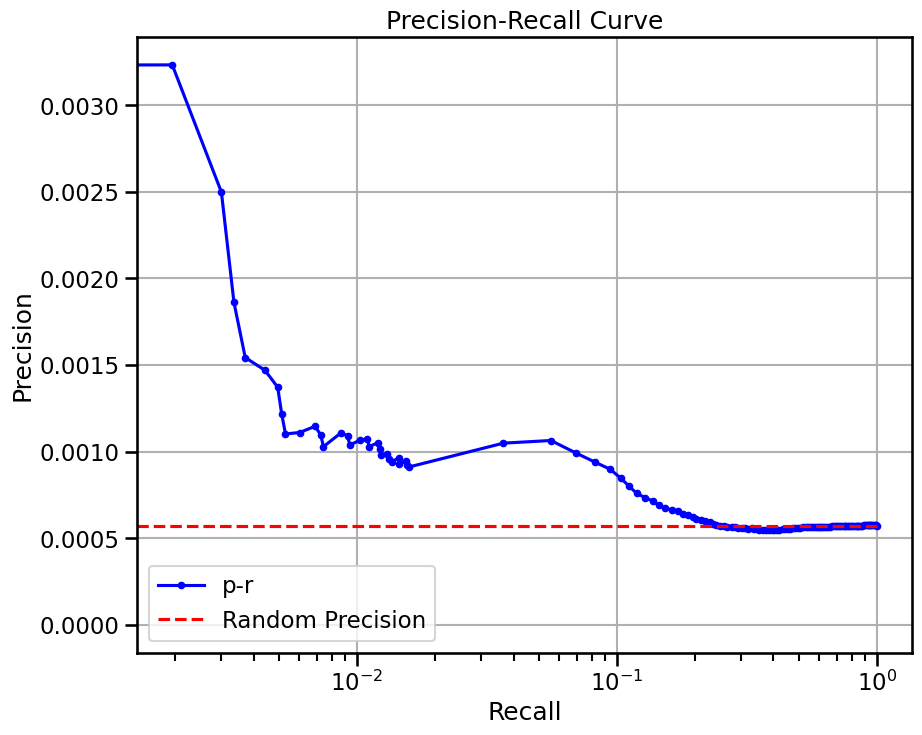

base enrichment


Top central genes: []


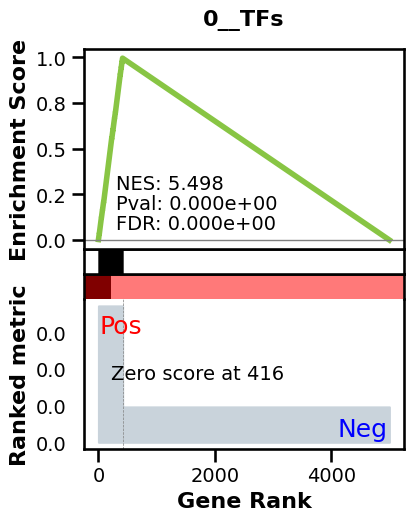

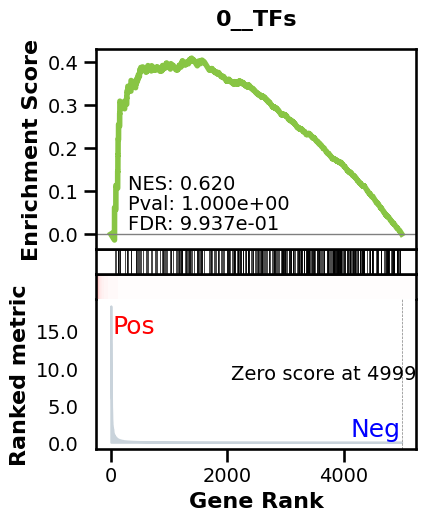

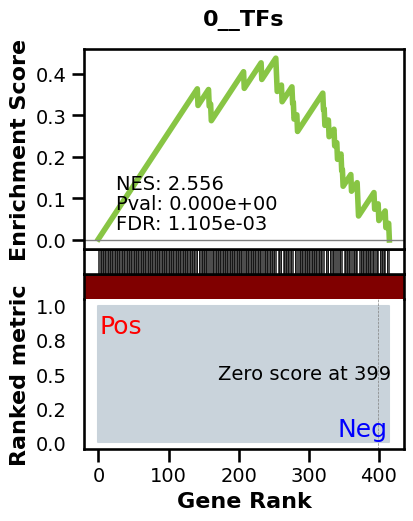

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2738 genes
intersection pct: 0.5476
precision:  0.002626778812706861 
recall:  0.5119321194979671 
random precision: 0.0005735728610913398


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 73.49it/s]

 12%|█▎        | 16/128 [00:00<00:01, 73.38it/s]

 19%|█▉        | 24/128 [00:00<00:01, 73.44it/s]

 25%|██▌       | 32/128 [00:00<00:01, 73.71it/s]

 31%|███▏      | 40/128 [00:00<00:01, 73.80it/s]

 38%|███▊      | 48/128 [00:00<00:01, 73.93it/s]

 44%|████▍     | 56/128 [00:00<00:00, 73.94it/s]

 50%|█████     | 64/128 [00:00<00:00, 73.80it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 73.69it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 73.64it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 73.76it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 73.81it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 73.89it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 73.90it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 73.89it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 73.60it/s]

100%|██████████| 128/128 [00:01<00:00, 73.70it/s]

Average Precision (AP):  0.0018833801490041402
Area Under Precision-Recall Curve (AUPRC):  0.0017015761057995423
EPR: 10.278361071682223


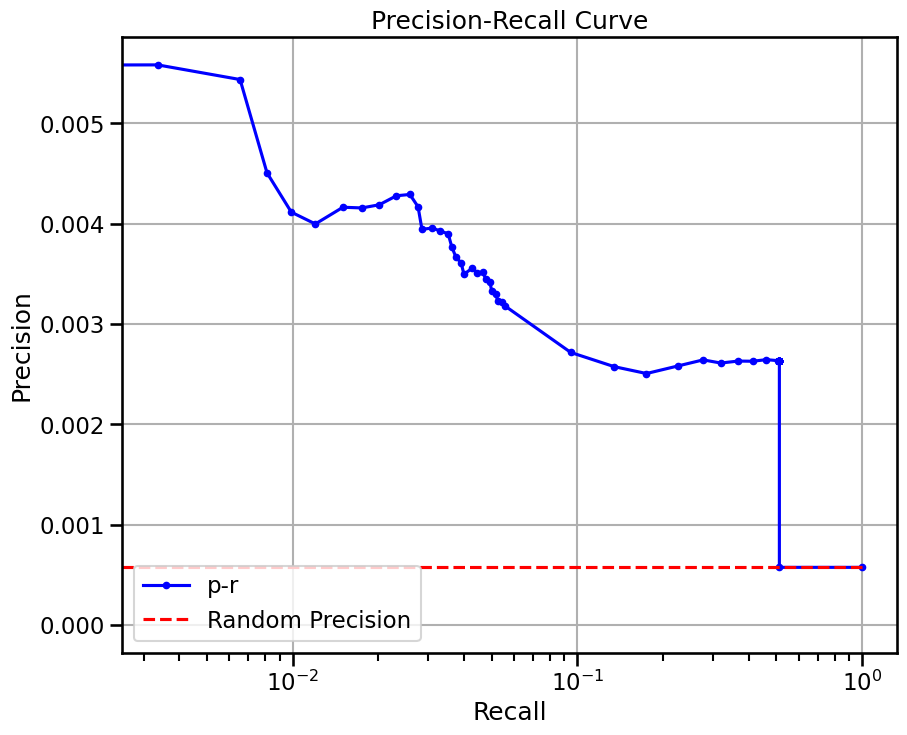

base enrichment


Top central genes: []
The DataFrame contains only the same values.


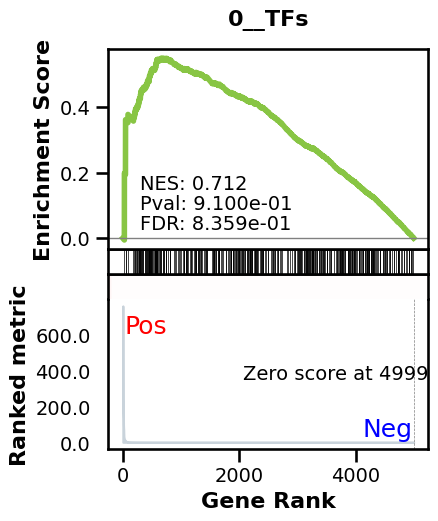

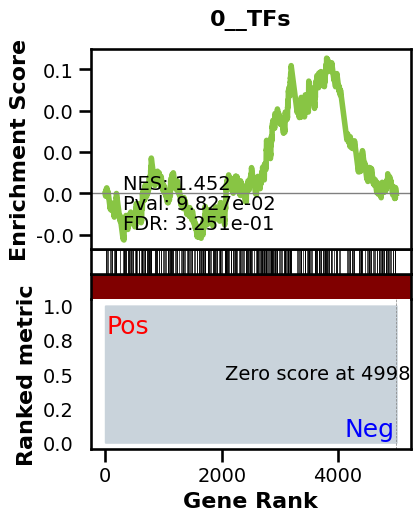

_________________________________________
TF specific enrichment


found some significant results for  16.666666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2738 genes
intersection pct: 0.5476
precision:  0.0005733902527305975 
recall:  1.0 
random precision: 0.0005735728610913398


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 73.90it/s]

 12%|█▎        | 16/128 [00:00<00:01, 74.03it/s]

 19%|█▉        | 24/128 [00:00<00:01, 74.12it/s]

 25%|██▌       | 32/128 [00:00<00:01, 74.19it/s]

 31%|███▏      | 40/128 [00:00<00:01, 74.05it/s]

 38%|███▊      | 48/128 [00:00<00:01, 73.82it/s]

 44%|████▍     | 56/128 [00:00<00:00, 73.75it/s]

 50%|█████     | 64/128 [00:00<00:00, 73.81it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 73.85it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 73.81it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 74.00it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 73.91it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 73.81it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 73.75it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 73.89it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 73.95it/s]

100%|██████████| 128/128 [00:01<00:00, 73.88it/s]

Average Precision (AP):  0.0006384088453092867
Area Under Precision-Recall Curve (AUPRC):  0.0006340441539156995
EPR: 4.331194149226738


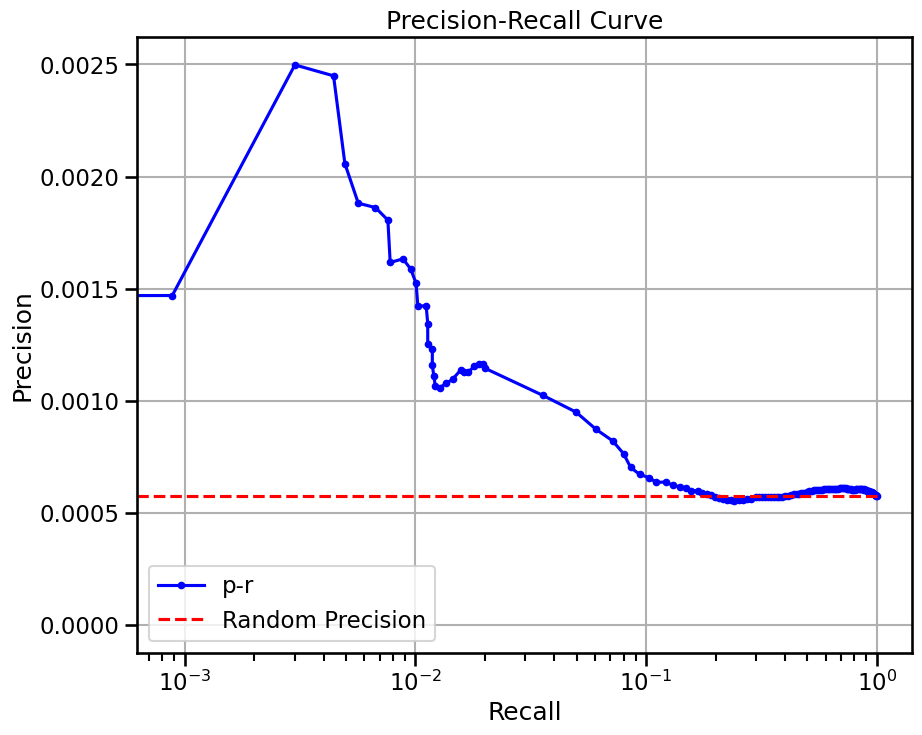

base enrichment


Top central genes: []


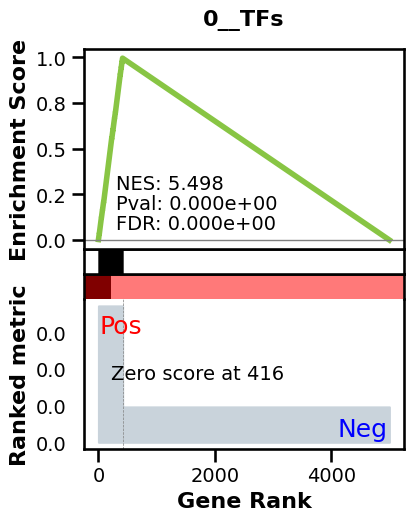

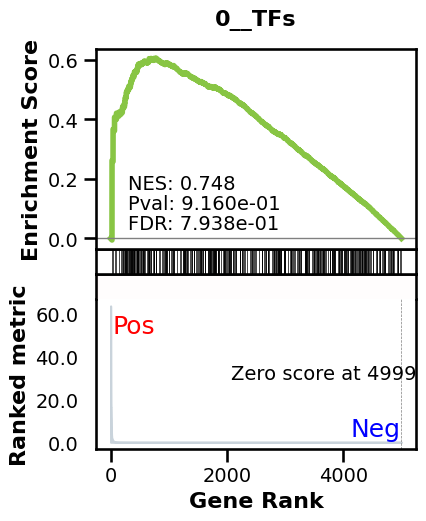

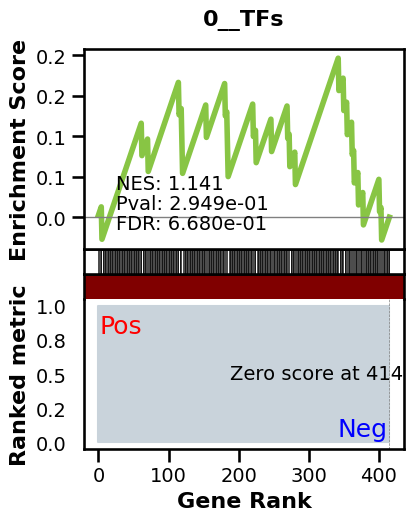

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2738 genes
intersection pct: 0.5476
precision:  0.002626778812706861 
recall:  0.5119321194979671 
random precision: 0.0005735728610913398


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 73.58it/s]

 12%|█▎        | 16/128 [00:00<00:01, 73.96it/s]

 19%|█▉        | 24/128 [00:00<00:01, 73.70it/s]

 25%|██▌       | 32/128 [00:00<00:01, 73.58it/s]

 31%|███▏      | 40/128 [00:00<00:01, 73.51it/s]

 38%|███▊      | 48/128 [00:00<00:01, 73.19it/s]

 44%|████▍     | 56/128 [00:00<00:00, 73.14it/s]

 50%|█████     | 64/128 [00:00<00:00, 73.28it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 73.31it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 73.28it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 73.35it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 73.38it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 73.27it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 73.20it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 73.28it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 73.21it/s]

100%|██████████| 128/128 [00:01<00:00, 73.30it/s]

Average Precision (AP):  0.002168233008079616
Area Under Precision-Recall Curve (AUPRC):  0.0019263616697875728
EPR: 10.278361071682223


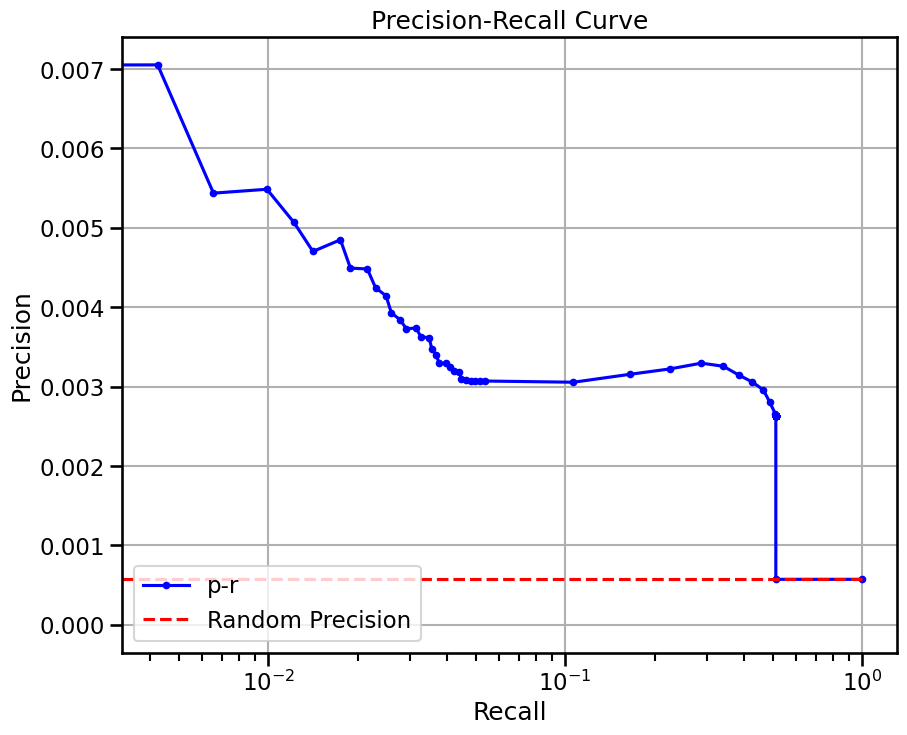

  0%|          | 0/16 [00:00<?, ?it/s]

  6%|▋         | 1/16 [00:02<00:40,  2.72s/it]

 12%|█▎        | 2/16 [00:04<00:26,  1.91s/it]

 19%|█▉        | 3/16 [00:05<00:21,  1.66s/it]

 25%|██▌       | 4/16 [00:08<00:26,  2.17s/it]

 31%|███▏      | 5/16 [00:09<00:20,  1.89s/it]

 38%|███▊      | 6/16 [00:11<00:17,  1.71s/it]

 44%|████▍     | 7/16 [00:12<00:14,  1.60s/it]

 50%|█████     | 8/16 [00:14<00:14,  1.78s/it]

 56%|█████▋    | 9/16 [00:16<00:11,  1.65s/it]

 62%|██████▎   | 10/16 [00:19<00:13,  2.24s/it]

 69%|██████▉   | 11/16 [00:20<00:09,  1.98s/it]

 75%|███████▌  | 12/16 [00:22<00:07,  1.81s/it]

 81%|████████▏ | 13/16 [00:23<00:05,  1.70s/it]

 88%|████████▊ | 14/16 [00:25<00:03,  1.61s/it]

 94%|█████████▍| 15/16 [00:26<00:01,  1.55s/it]

100%|██████████| 16/16 [00:27<00:00,  1.35s/it]

100%|██████████| 16/16 [00:27<00:00,  1.74s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


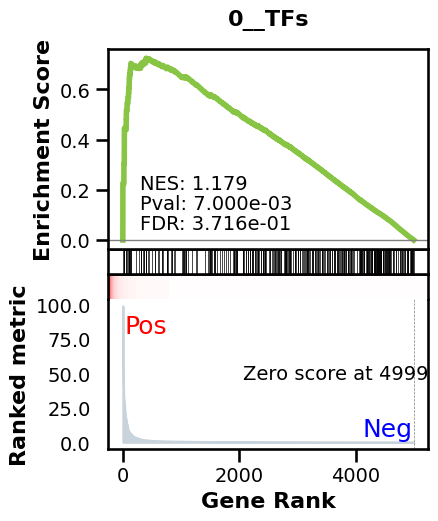

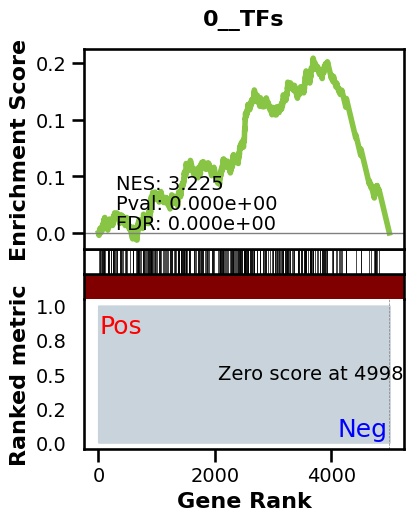

_________________________________________
TF specific enrichment


found some significant results for  30.434782608695652 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2784 genes
intersection pct: 0.5568
precision:  0.000710707345411276 
recall:  1.0 
random precision: 0.0007109307680285068


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 69.76it/s]

 12%|█▏        | 15/128 [00:00<00:01, 70.11it/s]

 18%|█▊        | 23/128 [00:00<00:01, 70.13it/s]

 24%|██▍       | 31/128 [00:00<00:01, 70.41it/s]

 30%|███       | 39/128 [00:00<00:01, 70.53it/s]

 37%|███▋      | 47/128 [00:00<00:01, 70.39it/s]

 43%|████▎     | 55/128 [00:00<00:01, 70.30it/s]

 49%|████▉     | 63/128 [00:00<00:00, 70.40it/s]

 55%|█████▌    | 71/128 [00:01<00:00, 70.49it/s]

 62%|██████▏   | 79/128 [00:01<00:00, 70.37it/s]

 68%|██████▊   | 87/128 [00:01<00:00, 70.53it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 70.61it/s]

 80%|████████  | 103/128 [00:01<00:00, 70.52it/s]

 87%|████████▋ | 111/128 [00:01<00:00, 70.49it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 70.37it/s]

 99%|█████████▉| 127/128 [00:01<00:00, 70.37it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 70.31it/s]

Average Precision (AP):  0.0008521303935608548
Area Under Precision-Recall Curve (AUPRC):  0.000848006500995123
EPR: 1.7611384739568408


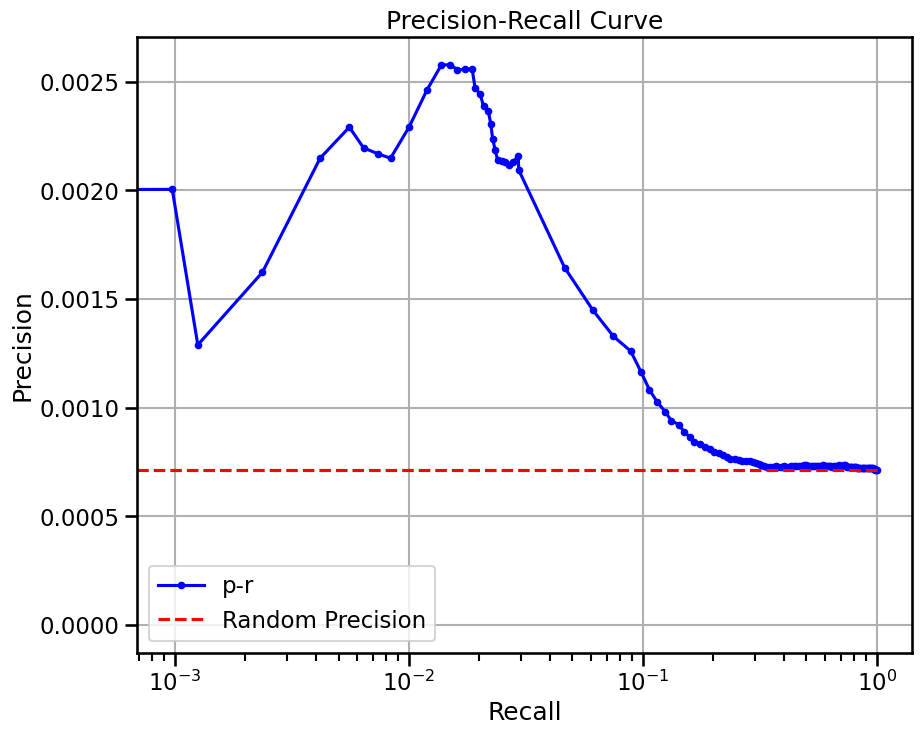

base enrichment


Top central genes: []


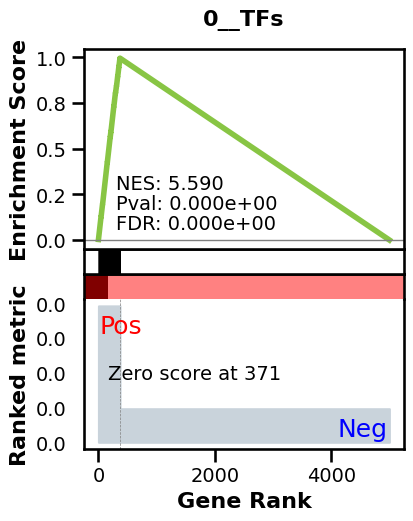

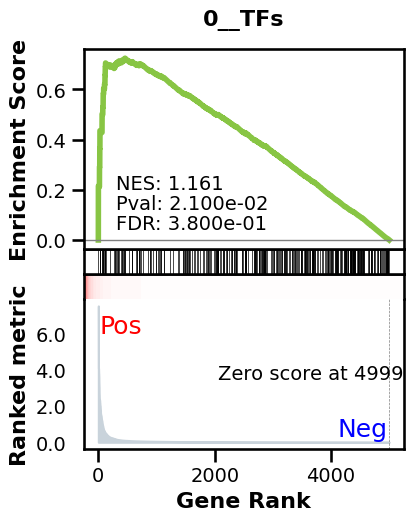

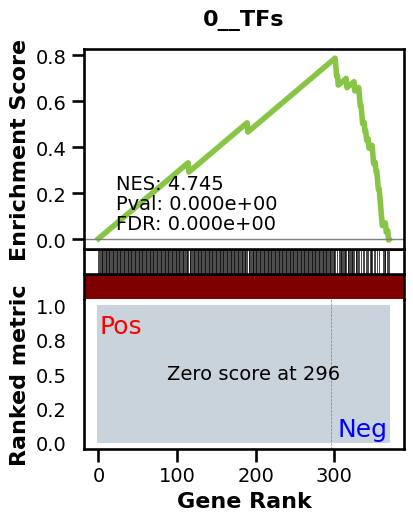

_________________________________________
TF specific enrichment


found some significant results for  8.695652173913043 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2784 genes
intersection pct: 0.5568
precision:  0.0038823077261827075 
recall:  0.5390494719288493 
random precision: 0.0007109307680285068


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 71.25it/s]

 12%|█▎        | 16/128 [00:00<00:01, 71.41it/s]

 19%|█▉        | 24/128 [00:00<00:01, 71.84it/s]

 25%|██▌       | 32/128 [00:00<00:01, 71.86it/s]

 31%|███▏      | 40/128 [00:00<00:01, 71.89it/s]

 38%|███▊      | 48/128 [00:00<00:01, 71.75it/s]

 44%|████▍     | 56/128 [00:00<00:01, 71.78it/s]

 50%|█████     | 64/128 [00:00<00:00, 71.68it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 71.69it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 71.64it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 71.70it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 71.75it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 71.29it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 71.27it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 71.41it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 71.37it/s]

100%|██████████| 128/128 [00:01<00:00, 71.54it/s]

Average Precision (AP):  0.0031328943433263927
Area Under Precision-Recall Curve (AUPRC):  0.0028790894858540866
EPR: 15.153144647140513


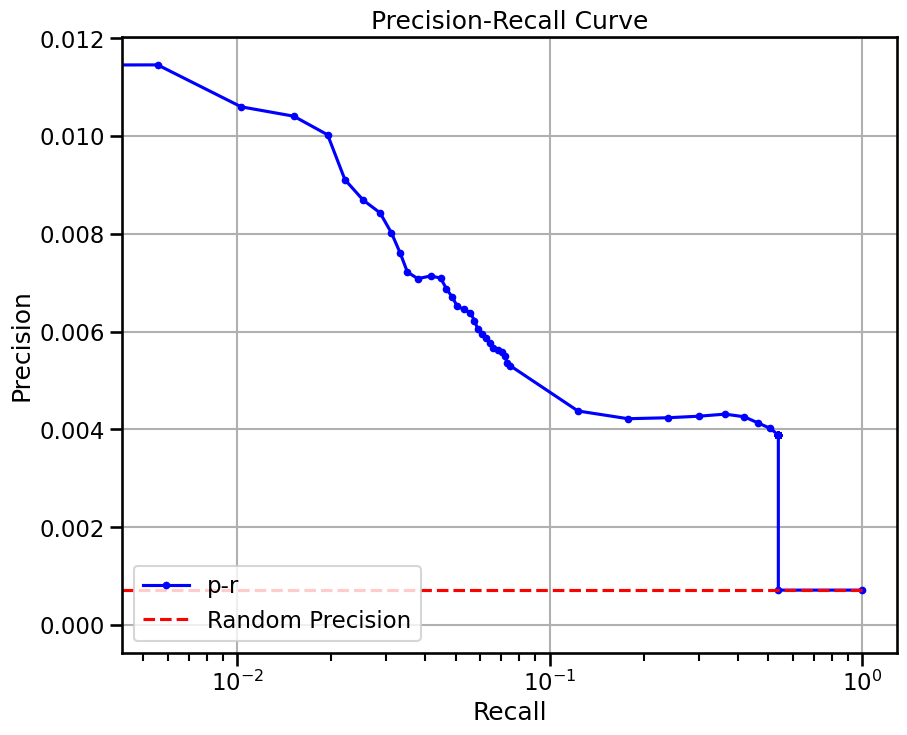

base enrichment


Top central genes: []
The DataFrame contains only the same values.


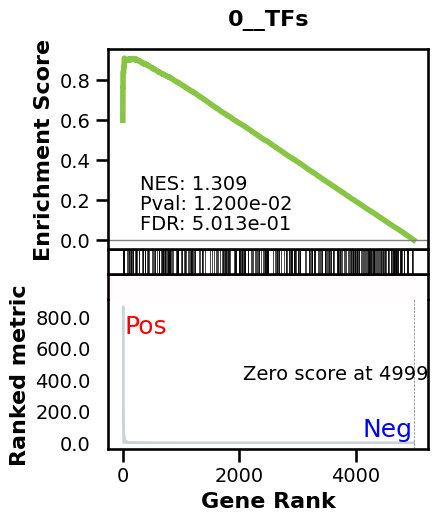

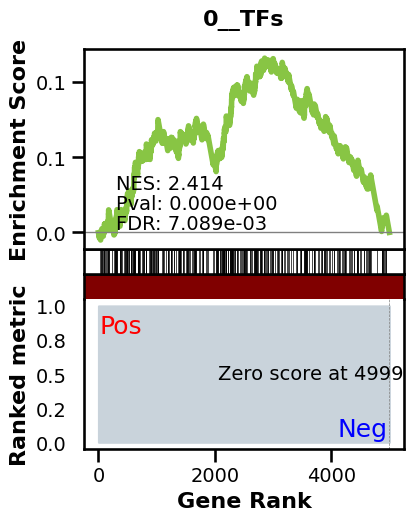

_________________________________________
TF specific enrichment


found some significant results for  34.78260869565217 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2784 genes
intersection pct: 0.5568
precision:  0.000710707345411276 
recall:  1.0 
random precision: 0.0007109307680285068


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 71.38it/s]

 12%|█▎        | 16/128 [00:00<00:01, 71.82it/s]

 19%|█▉        | 24/128 [00:00<00:01, 72.01it/s]

 25%|██▌       | 32/128 [00:00<00:01, 72.17it/s]

 31%|███▏      | 40/128 [00:00<00:01, 72.13it/s]

 38%|███▊      | 48/128 [00:00<00:01, 72.10it/s]

 44%|████▍     | 56/128 [00:00<00:01, 71.97it/s]

 50%|█████     | 64/128 [00:00<00:00, 71.81it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 71.88it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 71.79it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 71.77it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 71.74it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 71.80it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 71.76it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 71.69it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 71.49it/s]

100%|██████████| 128/128 [00:01<00:00, 71.76it/s]

Average Precision (AP):  0.0008674845666782722
Area Under Precision-Recall Curve (AUPRC):  0.0008593802545105655
EPR: 4.716041406610389


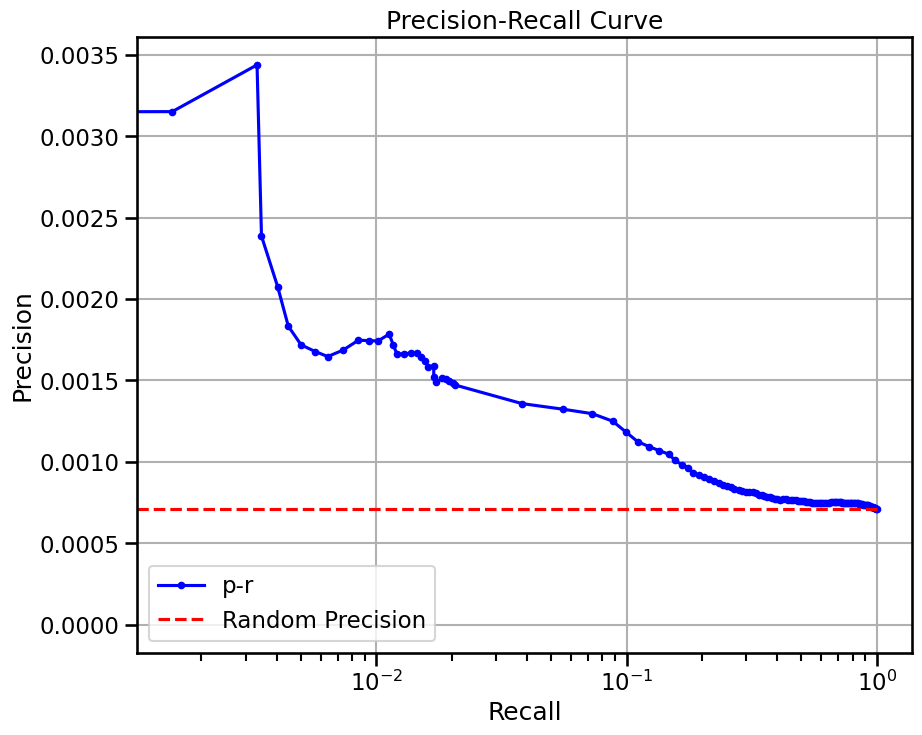

base enrichment


Top central genes: []


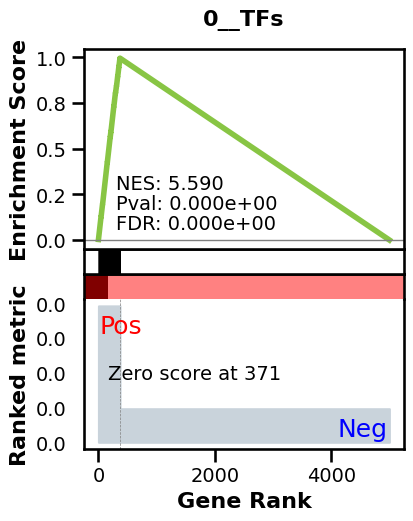

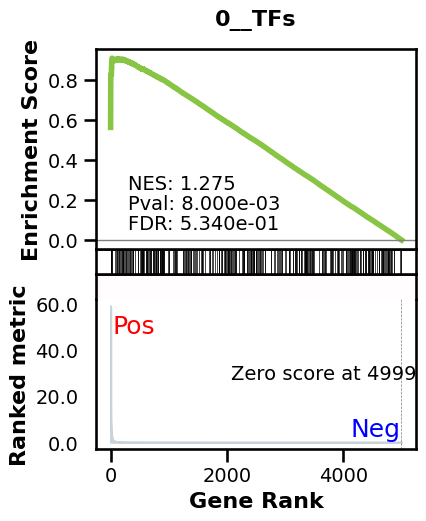

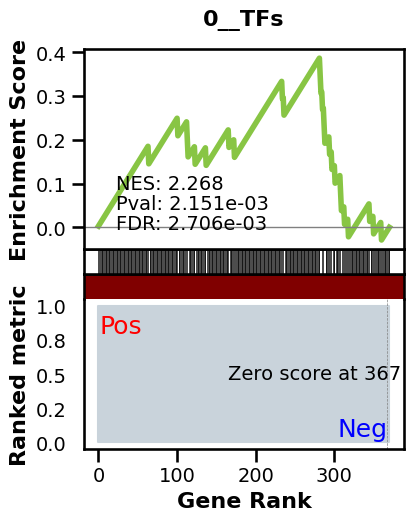

_________________________________________
TF specific enrichment


found some significant results for  4.3478260869565215 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2784 genes
intersection pct: 0.5568
precision:  0.0038823077261827075 
recall:  0.5390494719288493 
random precision: 0.0007109307680285068


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 61.72it/s]

 11%|█         | 14/128 [00:00<00:01, 61.66it/s]

 16%|█▋        | 21/128 [00:00<00:01, 61.71it/s]

 22%|██▏       | 28/128 [00:00<00:01, 61.58it/s]

 27%|██▋       | 35/128 [00:00<00:01, 61.68it/s]

 33%|███▎      | 42/128 [00:00<00:01, 61.61it/s]

 38%|███▊      | 49/128 [00:00<00:01, 61.68it/s]

 44%|████▍     | 56/128 [00:00<00:01, 61.75it/s]

 49%|████▉     | 63/128 [00:01<00:01, 61.71it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 61.82it/s]

 60%|██████    | 77/128 [00:01<00:00, 61.75it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 61.72it/s]

 71%|███████   | 91/128 [00:01<00:00, 61.62it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 61.70it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 61.74it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 61.65it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 61.70it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 61.68it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 61.64it/s]

Average Precision (AP):  0.0031650175004726533
Area Under Precision-Recall Curve (AUPRC):  0.0028498712444265236
EPR: 11.505971575381261


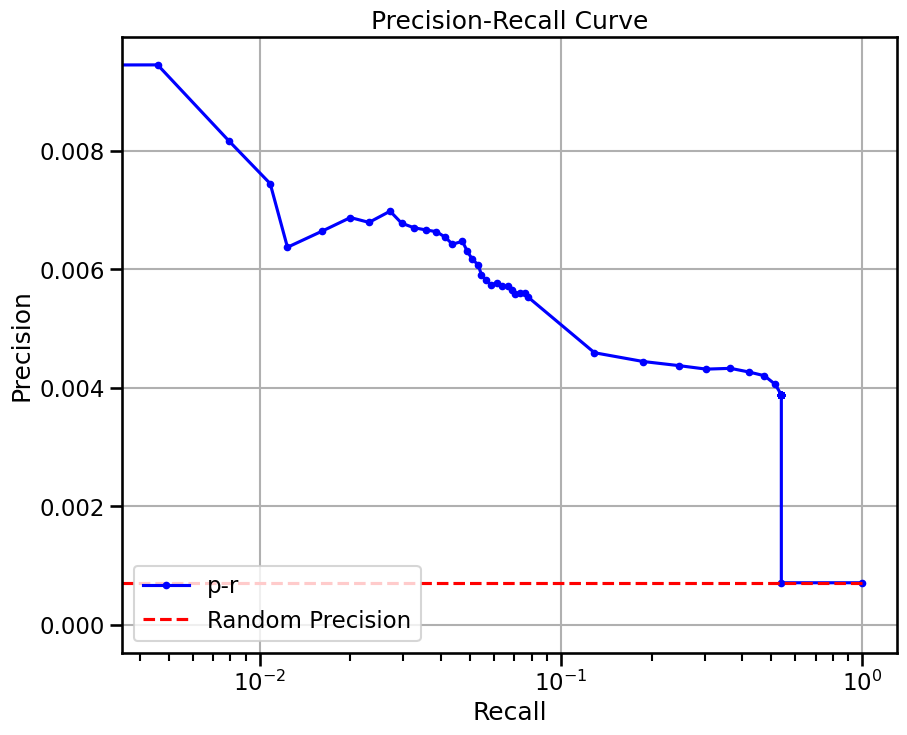

  0%|          | 0/15 [00:00<?, ?it/s]

  7%|▋         | 1/15 [00:02<00:41,  2.99s/it]

 13%|█▎        | 2/15 [00:05<00:33,  2.60s/it]

 20%|██        | 3/15 [00:06<00:24,  2.08s/it]

 27%|██▋       | 4/15 [00:08<00:20,  1.84s/it]

 33%|███▎      | 5/15 [00:09<00:17,  1.75s/it]

 40%|████      | 6/15 [00:11<00:15,  1.74s/it]

 47%|████▋     | 7/15 [00:13<00:13,  1.66s/it]

 53%|█████▎    | 8/15 [00:14<00:11,  1.65s/it]

 60%|██████    | 9/15 [00:17<00:11,  1.92s/it]

 67%|██████▋   | 10/15 [00:18<00:08,  1.79s/it]

 73%|███████▎  | 11/15 [00:20<00:07,  1.93s/it]

 80%|████████  | 12/15 [00:22<00:05,  1.91s/it]

 87%|████████▋ | 13/15 [00:25<00:04,  2.01s/it]

 93%|█████████▎| 14/15 [00:26<00:01,  1.87s/it]

100%|██████████| 15/15 [00:26<00:00,  1.42s/it]

100%|██████████| 15/15 [00:27<00:00,  1.82s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


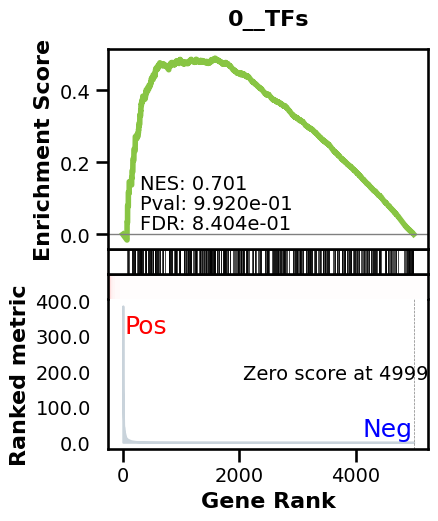

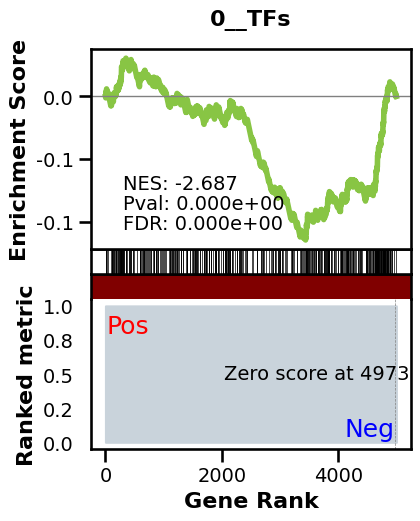

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.001192520141082607 
recall:  1.0 
random precision: 0.0011928575831146055


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 52.67it/s]

  9%|▉         | 12/128 [00:00<00:02, 52.73it/s]

 14%|█▍        | 18/128 [00:00<00:02, 52.90it/s]

 19%|█▉        | 24/128 [00:00<00:01, 52.84it/s]

 23%|██▎       | 30/128 [00:00<00:01, 52.92it/s]

 28%|██▊       | 36/128 [00:00<00:01, 52.97it/s]

 33%|███▎      | 42/128 [00:00<00:01, 53.03it/s]

 38%|███▊      | 48/128 [00:00<00:01, 52.90it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.84it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.86it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.80it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.82it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.88it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.68it/s]

 70%|███████   | 90/128 [00:01<00:00, 52.71it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 52.83it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.88it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.94it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.99it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.99it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 52.92it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 52.83it/s]

Average Precision (AP):  0.0013408196939190687
Area Under Precision-Recall Curve (AUPRC):  0.00133935325760052


EPR: 1.125451319497098


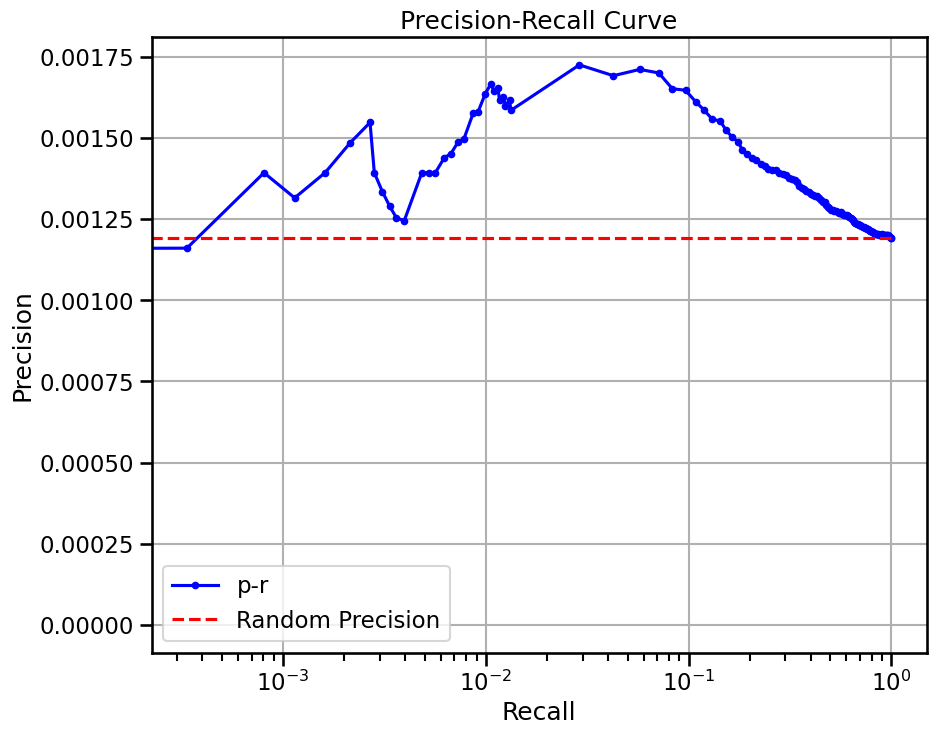

base enrichment


Top central genes: []


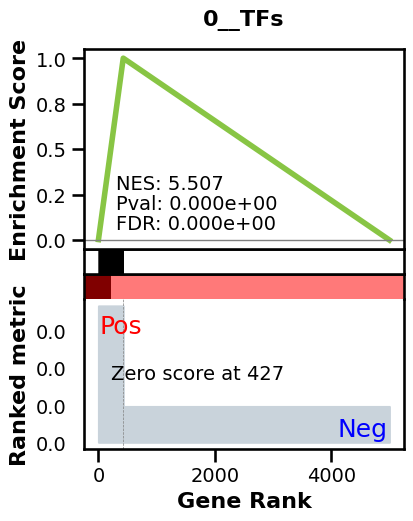

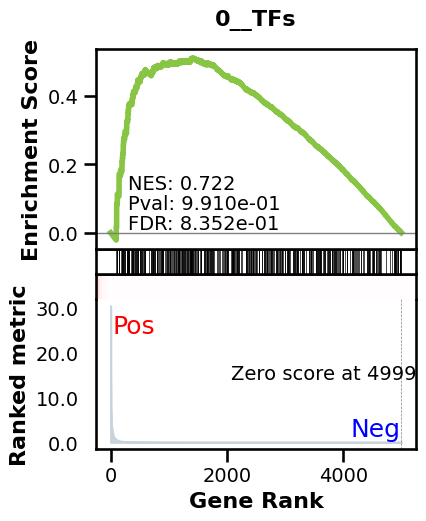

_________________________________________
TF specific enrichment


found some significant results for  15.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.0052568900331060745 
recall:  0.4576566903771306 
random precision: 0.0011928575831146055


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.11it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.00it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.87it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.86it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.89it/s]

 28%|██▊       | 36/128 [00:00<00:01, 54.94it/s]

 33%|███▎      | 42/128 [00:00<00:01, 54.88it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.90it/s]

 42%|████▏     | 54/128 [00:00<00:01, 54.78it/s]

 47%|████▋     | 60/128 [00:01<00:01, 54.81it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 54.86it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.88it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.84it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 54.83it/s]

 70%|███████   | 90/128 [00:01<00:00, 54.89it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 54.88it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 54.89it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 54.90it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 54.76it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 54.89it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 54.84it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.82it/s]

Average Precision (AP):  0.00386367812103191
Area Under Precision-Recall Curve (AUPRC):  0.0034923372480756
EPR: 7.076415159637595


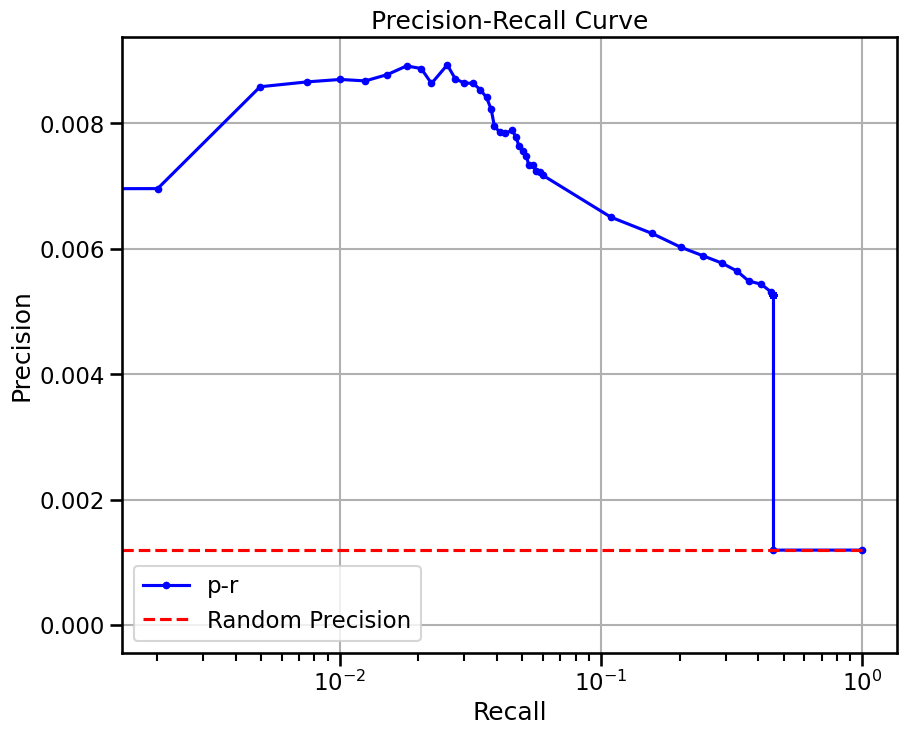

base enrichment


Top central genes: []
The DataFrame contains only the same values.


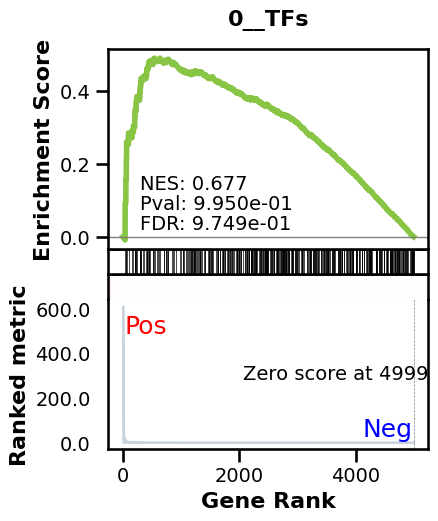

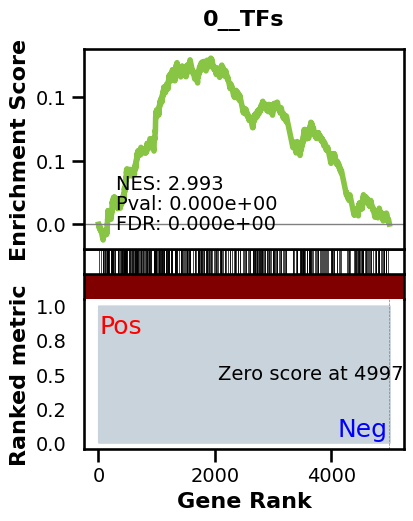

_________________________________________
TF specific enrichment


found some significant results for  30.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.001192520141082607 
recall:  1.0 
random precision: 0.0011928575831146055


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.90it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.76it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.75it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.82it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.93it/s]

 28%|██▊       | 36/128 [00:00<00:01, 54.96it/s]

 33%|███▎      | 42/128 [00:00<00:01, 54.70it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.76it/s]

 42%|████▏     | 54/128 [00:00<00:01, 54.84it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.04it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.04it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.89it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.95it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.01it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.05it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.21it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.14it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 54.90it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 54.94it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.01it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.05it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.92it/s]

Average Precision (AP):  0.0014743067328314313
Area Under Precision-Recall Curve (AUPRC):  0.0014728206698191408


EPR: 2.030178016669077


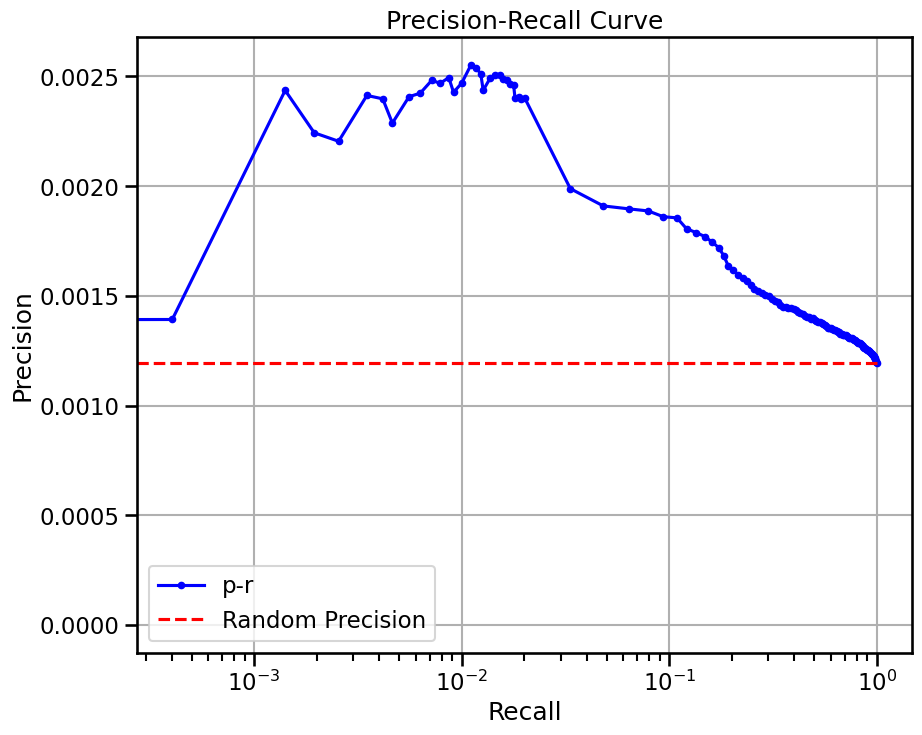

base enrichment


Top central genes: []


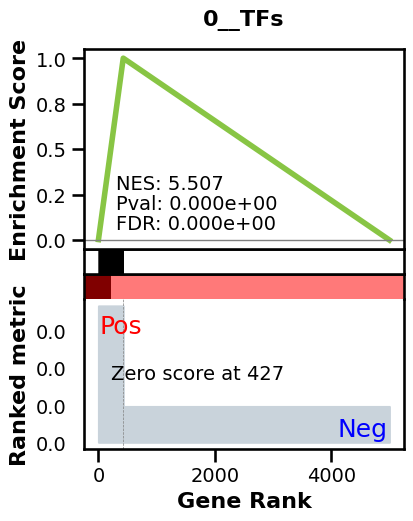

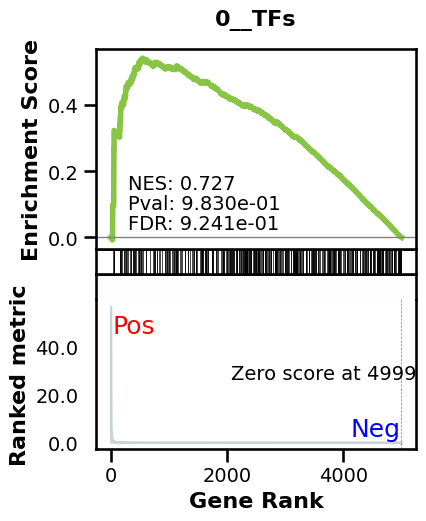

_________________________________________
TF specific enrichment


found some significant results for  7.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.0052568900331060745 
recall:  0.4576566903771306 
random precision: 0.0011928575831146055


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 49.16it/s]

  9%|▊         | 11/128 [00:00<00:02, 52.36it/s]

 13%|█▎        | 17/128 [00:00<00:02, 53.39it/s]

 18%|█▊        | 23/128 [00:00<00:01, 53.81it/s]

 23%|██▎       | 29/128 [00:00<00:01, 54.02it/s]

 27%|██▋       | 35/128 [00:00<00:01, 54.10it/s]

 32%|███▏      | 41/128 [00:00<00:01, 54.11it/s]

 37%|███▋      | 47/128 [00:00<00:01, 54.23it/s]

 41%|████▏     | 53/128 [00:00<00:01, 54.31it/s]

 46%|████▌     | 59/128 [00:01<00:01, 54.38it/s]

 51%|█████     | 65/128 [00:01<00:01, 54.45it/s]

 55%|█████▌    | 71/128 [00:01<00:01, 54.46it/s]

 60%|██████    | 77/128 [00:01<00:00, 54.47it/s]

 65%|██████▍   | 83/128 [00:01<00:00, 54.48it/s]

 70%|██████▉   | 89/128 [00:01<00:00, 54.49it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 54.49it/s]

 79%|███████▉  | 101/128 [00:01<00:00, 54.47it/s]

 84%|████████▎ | 107/128 [00:01<00:00, 54.43it/s]

 88%|████████▊ | 113/128 [00:02<00:00, 54.43it/s]

 93%|█████████▎| 119/128 [00:02<00:00, 54.42it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 54.43it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.18it/s]

Average Precision (AP):  0.004214314048964523
Area Under Precision-Recall Curve (AUPRC):  0.003813199340994222
EPR: 10.115045275675262


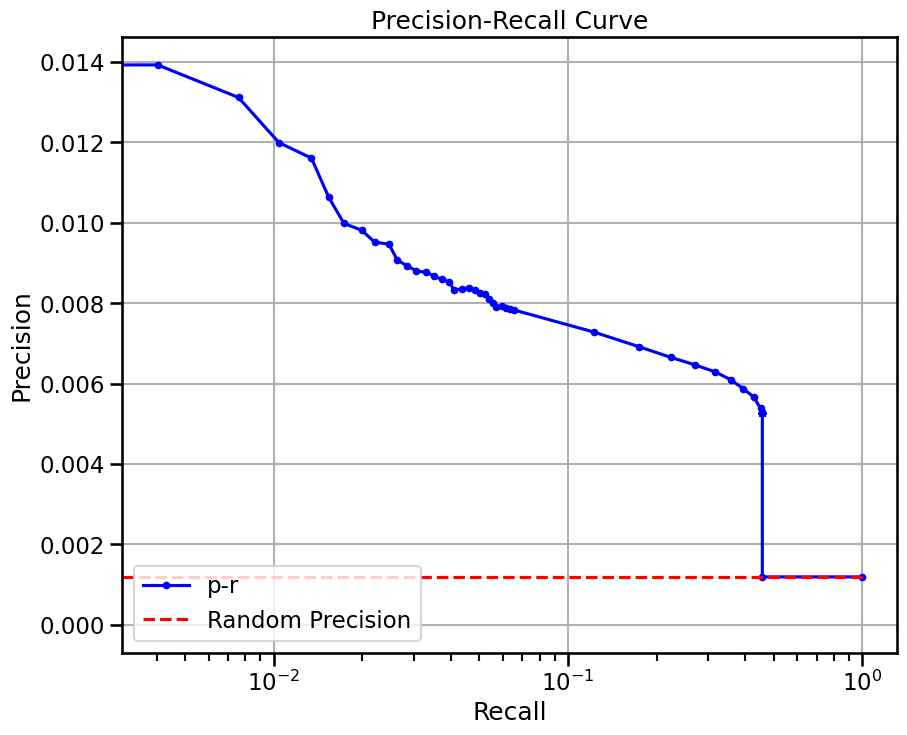

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:02<00:05,  2.55s/it]

 67%|██████▋   | 2/3 [00:03<00:01,  1.84s/it]

100%|██████████| 3/3 [00:04<00:00,  1.08s/it]

100%|██████████| 3/3 [00:04<00:00,  1.43s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


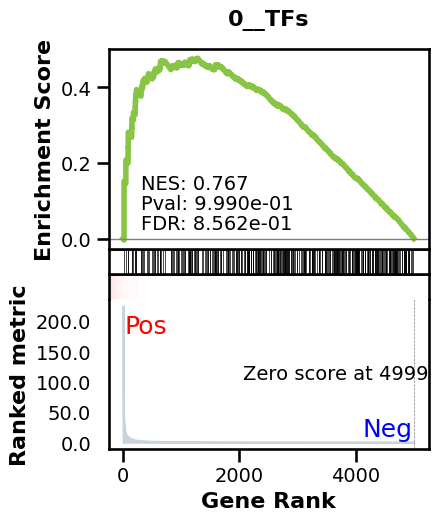

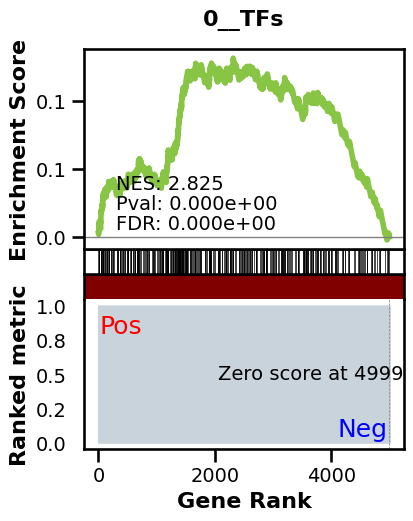

_________________________________________
TF specific enrichment


found some significant results for  30.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3159 genes
intersection pct: 0.6318
precision:  0.0009807661569609463 
recall:  1.0 
random precision: 0.000981052595675012


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 61.87it/s]

 11%|█         | 14/128 [00:00<00:01, 61.89it/s]

 16%|█▋        | 21/128 [00:00<00:01, 61.98it/s]

 22%|██▏       | 28/128 [00:00<00:01, 61.95it/s]

 27%|██▋       | 35/128 [00:00<00:01, 61.90it/s]

 33%|███▎      | 42/128 [00:00<00:01, 61.92it/s]

 38%|███▊      | 49/128 [00:00<00:01, 61.92it/s]

 44%|████▍     | 56/128 [00:00<00:01, 61.72it/s]

 49%|████▉     | 63/128 [00:01<00:01, 61.78it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 61.81it/s]

 60%|██████    | 77/128 [00:01<00:00, 61.85it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 61.88it/s]

 71%|███████   | 91/128 [00:01<00:00, 61.78it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.80it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.25it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 59.84it/s]

 92%|█████████▏| 118/128 [00:01<00:00, 59.63it/s]

 97%|█████████▋| 124/128 [00:02<00:00, 58.98it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.86it/s]

Average Precision (AP):  0.001075151626295269
Area Under Precision-Recall Curve (AUPRC):  0.0010746860786426723
EPR: 1.1521100454693645


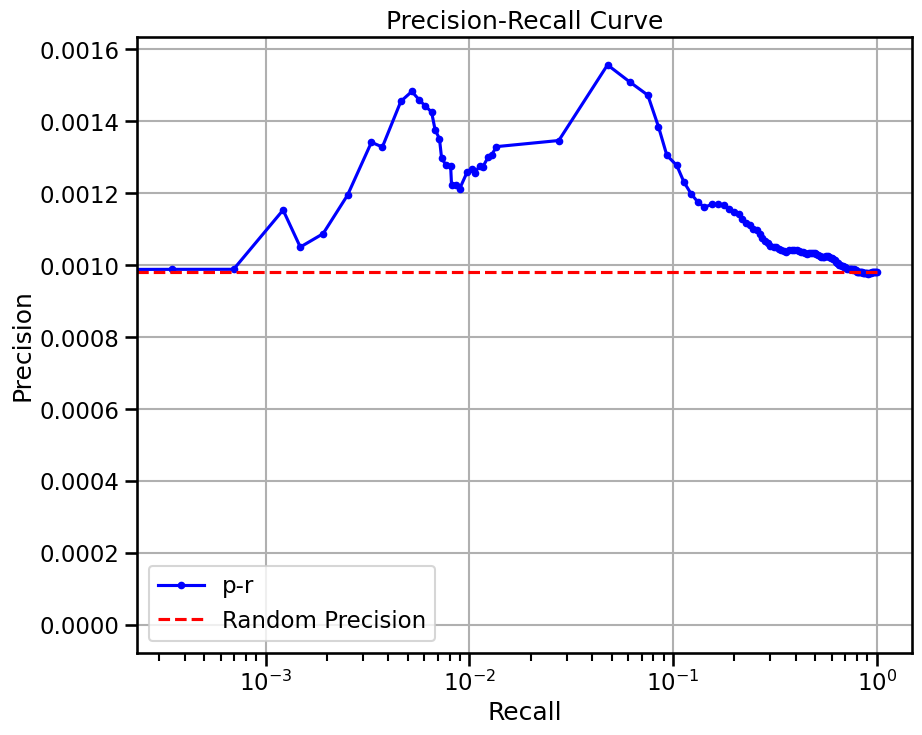

base enrichment


Top central genes: []


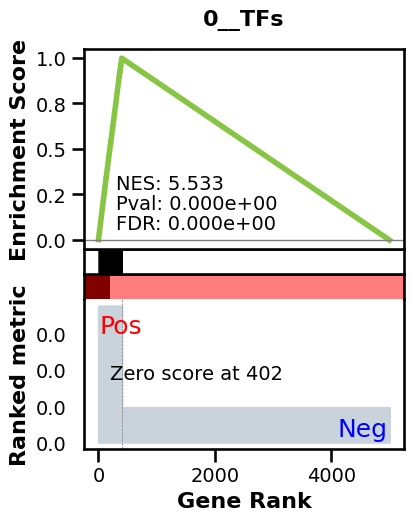

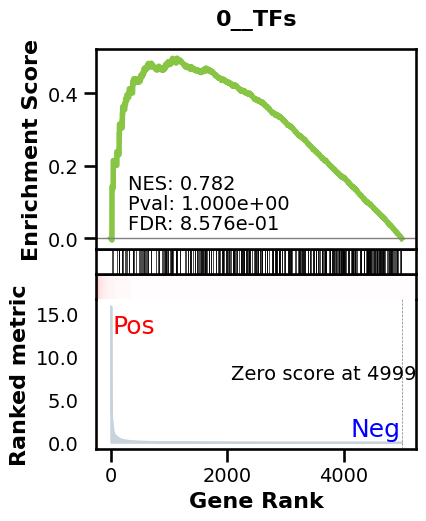

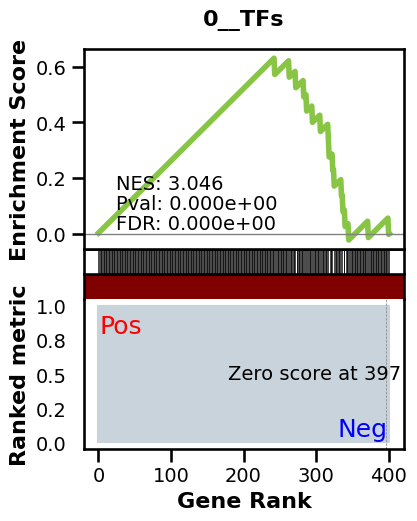

_________________________________________
TF specific enrichment


found some significant results for  10.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3159 genes
intersection pct: 0.6318
precision:  0.004688075101838258 
recall:  0.49265536723163844 
random precision: 0.000981052595675012


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 61.18it/s]

 11%|█         | 14/128 [00:00<00:01, 61.33it/s]

 16%|█▋        | 21/128 [00:00<00:01, 61.43it/s]

 22%|██▏       | 28/128 [00:00<00:01, 61.39it/s]

 27%|██▋       | 35/128 [00:00<00:01, 61.46it/s]

 33%|███▎      | 42/128 [00:00<00:01, 61.21it/s]

 38%|███▊      | 49/128 [00:00<00:01, 61.33it/s]

 44%|████▍     | 56/128 [00:00<00:01, 61.27it/s]

 49%|████▉     | 63/128 [00:01<00:01, 61.39it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 61.25it/s]

 60%|██████    | 77/128 [00:01<00:00, 61.30it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 61.15it/s]

 71%|███████   | 91/128 [00:01<00:00, 61.33it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 61.26it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 61.35it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 61.24it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 61.36it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 61.35it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 61.29it/s]

Average Precision (AP):  0.003447386258767806
Area Under Precision-Recall Curve (AUPRC):  0.003001167256016196
EPR: 6.62837971180971


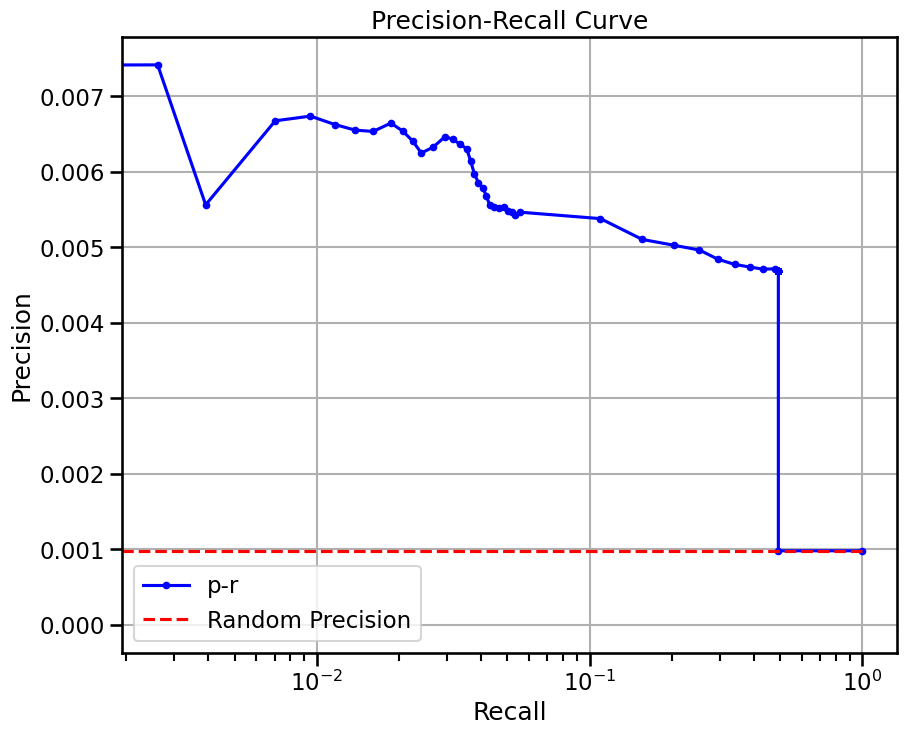

base enrichment


Top central genes: []
The DataFrame contains only the same values.


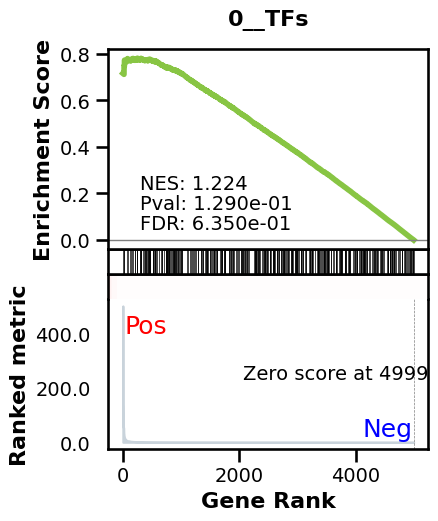

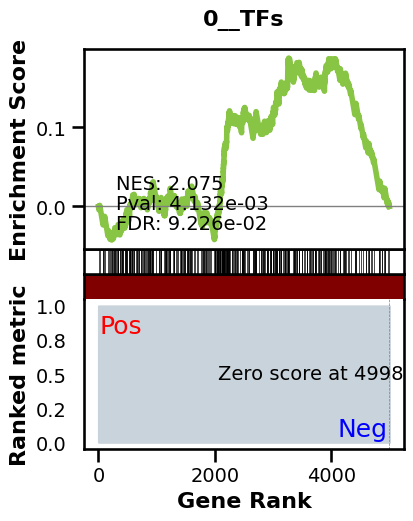

_________________________________________
TF specific enrichment


found some significant results for  20.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3159 genes
intersection pct: 0.6318
precision:  0.0009807661569609463 
recall:  1.0 
random precision: 0.000981052595675012


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 61.46it/s]

 11%|█         | 14/128 [00:00<00:01, 61.27it/s]

 16%|█▋        | 21/128 [00:00<00:01, 61.30it/s]

 22%|██▏       | 28/128 [00:00<00:01, 61.15it/s]

 27%|██▋       | 35/128 [00:00<00:01, 61.23it/s]

 33%|███▎      | 42/128 [00:00<00:01, 61.17it/s]

 38%|███▊      | 49/128 [00:00<00:01, 61.12it/s]

 44%|████▍     | 56/128 [00:00<00:01, 61.01it/s]

 49%|████▉     | 63/128 [00:01<00:01, 61.04it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.94it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.90it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 61.01it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.97it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.95it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.89it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.90it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.90it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 61.04it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 61.00it/s]

Average Precision (AP):  0.0009726710222725889
Area Under Precision-Recall Curve (AUPRC):  0.0009709045937149495
EPR: 1.5966190038073858


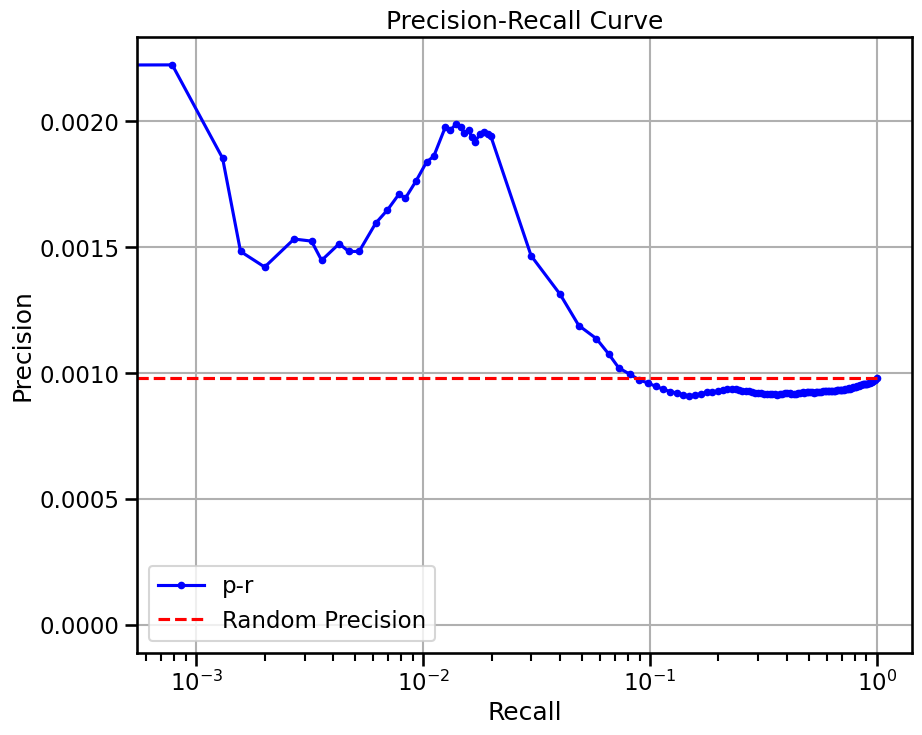

base enrichment


Top central genes: []


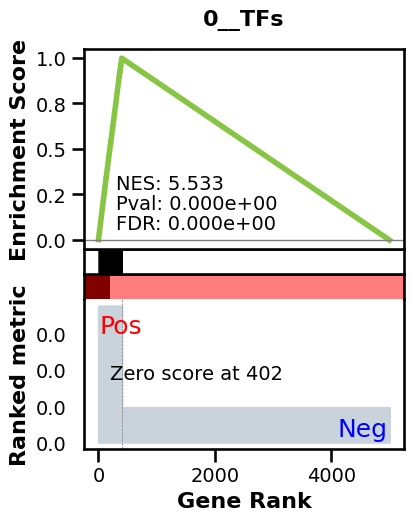

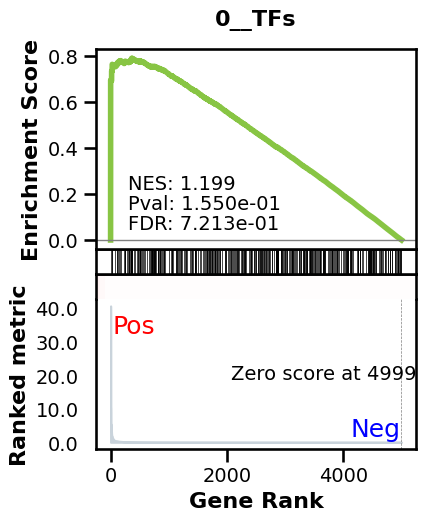

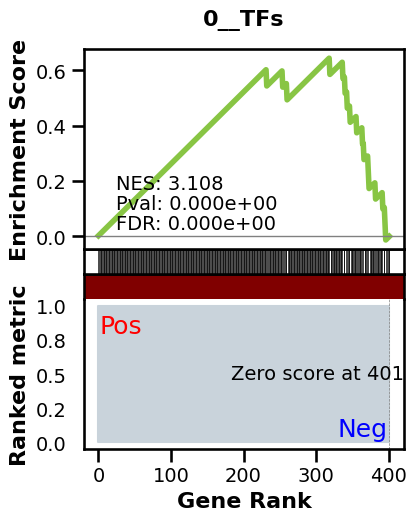

_________________________________________
TF specific enrichment


found some significant results for  5.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3159 genes
intersection pct: 0.6318
precision:  0.004688075101838258 
recall:  0.49265536723163844 
random precision: 0.000981052595675012


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 61.15it/s]

 11%|█         | 14/128 [00:00<00:01, 60.95it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.93it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.82it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.89it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.87it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.89it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.86it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.84it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.86it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.79it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.87it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.80it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.79it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.80it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.82it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.75it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.70it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.77it/s]

Average Precision (AP):  0.0031401163450928155
Area Under Precision-Recall Curve (AUPRC):  0.002690656455259852
EPR: 6.7191285308496544


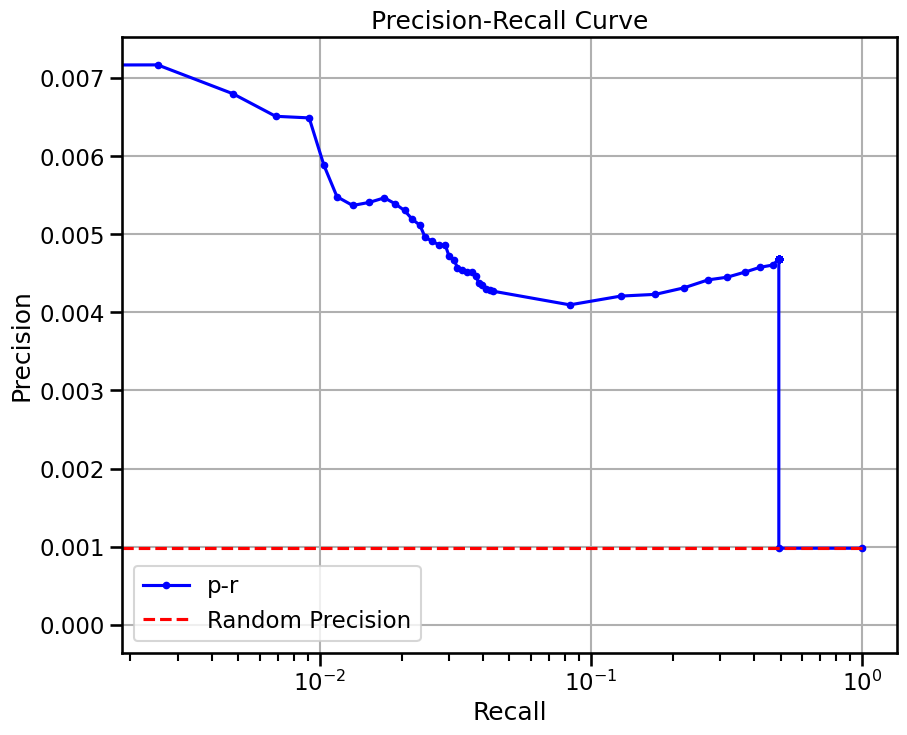

In [6]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    #grn_inferer = GRNfer(model, adata,
    #                    how="random expr",
    #                    preprocess="softmax",
    #                    head_agg='mean',
    #                    filtration="none",
    #                    forward_mode="none",
    #                    num_genes=2200,
    #                    max_cells=MAXCELLS,
    #                    doplot=False,
    #                    batch_size=32,
    #                    )
    #grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    #grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    #metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    #del grn
    grn_inferer = GRNfer(model, adata,
                        how="most var across",
                        preprocess="softmax",
                        head_agg='none',
                        filtration="none",
                        forward_mode="none",
                        num_genes=NUM_GENES,
                        max_cells=1024,
                        doplot=False,
                        batch_size=16,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['all'][:,:,:].mean(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_mean'] = BenGRN(grn).scprint_benchmark()
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.9, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=400, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [7]:
metrics

{'fibroblast_scprint_mean': {'enriched_terms_Regulators': ['celltype.gmt__Immune system cells'],
  'TF_enr': False,
  'significant_enriched_TFtargets': 36.111111111111114,
  'precision': 0.0012460602944679446,
  'recall': 1.0,
  'rand_precision': 0.0012464244266404952,
  'auprc': 0.0015184143620270468,
  'ap': 0.0015192777840916832,
  'epr': 0.5488993418929374},
 'fibroblast_scprint_tf_mean': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Endometrium',
   'celltype.gmt__Satellite cells',
   'celltype.gmt__Sebocytes',
   'celltype.gmt__Gamma (PP) cells'],
  'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Immune system cells'],
  'significant_enriched_TFtargets': 16.666666666666668,
  'precision': 0.009027741976136058,
  'recall': 0.6476712328767124,
  'rand_precision': 0.0012464244266404952,
  'auprc': 0.008093870891582944,
  'ap': 0.00852972022040066,
  'epr': 13.950869909410002},
 'fibroblast_scprint_class': {'TF_enr': F

In [8]:
# top 10 only 
# enriched terms regulators doesn't exist for class but helps for scprint full
#F
#T
#F
#
#F
#T
#F
#
#T
#T
#F
#
#F
#F
#F
#
#F
#F
#F
#
#T
#T
#F
#
#F
#F
#F 4/7 


In [9]:
import pandas as pd

In [10]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['ap'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'AP', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

tools                name        EPR     AUPRC        AP      RAND  \
0    mean          fibroblast   0.548899  0.001518  0.001519  0.001246   
1    mean          fibroblast  13.950870  0.008094  0.008530  0.001246   
2   class          fibroblast   7.823473  0.001855  0.001861  0.001246   
3   class          fibroblast  21.289829  0.009150  0.010087  0.001246   
4    mean    endothelial cell   1.226469  0.001762  0.001763  0.001591   
5    mean    endothelial cell   8.228691  0.004526  0.004909  0.001591   
6   class    endothelial cell   2.081192  0.001966  0.001968  0.001591   
7   class    endothelial cell   8.195717  0.004895  0.005324  0.001591   
8    mean  myofibroblast cell   1.297507  0.000920  0.000921  0.000804   
9    mean  myofibroblast cell   7.071389  0.002000  0.002263  0.000804   
10  class  myofibroblast cell   3.777750  0.000922  0.000924  0.000804   
11  class  myofibroblast cell   7.601576  0.001875  0.002143  0.000804   
12   mean          glial cell   4.642211  0.000627  0.000630  0.000574   
13   mean          glial cell  10.278361  0.001702  0.001883  0.000574   
14  class          glial cell   4.331194  0.000634  0.000638  0.000574   
15  class          glial cell  10.278361  0.001926  0.002168  0.000574   
16   mean            pericyte   1.761138  0.000848  0.000852  0.000711   
17   mean            pericyte  15.153145  0.002879  0.003133  0.000711   
18  class            pericyte   4.716041  0.000859  0.000867  0.000711   
19  class            pericyte  11.505972  0.002850  0.003165  0.000711   
20   mean          lymphocyte   1.125451  0.001339  0.001341  0.001193   
21   mean          lymphocyte   7.076415  0.003492  0.003864  0.001193   
22  class          lymphocyte   2.030178  0.001473  0.001474  0.001193   
23  class          lymphocyte  10.115045  0.003813  0.004214  0.001193   
24   mean        stromal cell   1.152110  0.001075  0.001075  0.000981   
25   mean        stromal cell   6.628380  0.003001  0.003447  0.000981   
26  class        stromal cell   1.596619  0.000971  0.000973  0.000981   
27  class        stromal cell   6.719129  0.002691  0.003140  0.000981   

      TF_targ  TF_enr  TF_only  
0   36.111111   False    False  
1   16.666667    True     True  
2   30.555556   False    False  
3    5.555556    True     True  
4   21.428571    True    False  
5   12.500000    True     True  
6   35.714286    True    False  
7    8.928571    True     True  
8   25.000000    True    False  
9    7.142857    True     True  
10  14.285714    True    False  
11   3.571429    True     True  
12  33.333333    True    False  
13   0.000000    True     True  
14  16.666667   False    False  
15   0.000000    True     True  
16  30.434783    True    False  
17   8.695652    True     True  
18  34.782609    True    False  
19   4.347826    True     True  
20  25.000000    True    False  
21  15.000000    True     True  
22  30.000000    True    False  
23   7.500000    True     True  
24  30.000000    True    False  
25  10.000000    True     True  
26  20.000000    True    False  
27   5.000000    True     True

tools	name	EPR	AUPRC	AP	RAND	TF_targ	TF_enr	TF_only
0	mean	fibroblast	0.438999	0.000984	0.000984	0.001246	2.777778	False	False
1	mean2	fibroblast	0.274262	0.001171	0.001174	0.001246	13.888889	False	False
2	class	fibroblast	7.766516	0.001908	0.001911	0.001246	36.111111	False	False
3	mean	endothelial cell	1.131785	0.001357	0.001357	0.001591	5.357143	False	False
4	mean2	endothelial cell	1.005627	0.001359	0.001360	0.001591	12.500000	False	False
5	class	endothelial cell	2.398931	0.002025	0.002027	0.001591	30.357143	False	False
6	mean	myofibroblast cell	0.777854	0.000794	0.000795	0.000804	3.571429	True	False
7	mean2	myofibroblast cell	1.427556	0.000777	0.000777	0.000804	7.142857	True	False
8	class	myofibroblast cell	3.908835	0.000931	0.000933	0.000804	10.714286	False	False

{'fibroblast_scprint_mean': {'significant_enriched_TFtargets': 2.7777777777777777,
  'precision': 0.0012460602944679446,
  'recall': 1.0,
  'rand_precision': 0.0012464244266404952,
  'auprc': 0.0009840164851802249,
  'ap': 0.0009843407952427454,
  'epr': 0.43899903395756384},
 'fibroblast_scprint_mean2': {'enriched_terms_Regulators': ['celltype.gmt__Immune system cells'],
  'significant_enriched_TFtargets': 13.88888888888889,
  'precision': 0.0012460602944679446,
  'recall': 1.0,
  'rand_precision': 0.0012464244266404952,
  'auprc': 0.0011710590006888577,
  'ap': 0.001174298855148791,
  'epr': 0.27426154216840887},
 'fibroblast_scprint_class': {'enriched_terms_Targets': ['celltype.gmt__Hepatic stellate cells',
   'celltype.gmt__Fibroblasts',
   '0__TFs',
   'celltype.gmt__Stromal cells',
   'celltype.gmt__Paneth cells',
   'celltype.gmt__Renal interstitium (Mesenchymal cells)',
   'celltype.gmt__Adipose progenitor cells',
   'celltype.gmt__Neutrophils',
   'celltype.gmt__Smooth muscle cells',
   'celltype.gmt__Odontoblasts',
   'celltype.gmt__Hepatoblasts'],
  'significant_enriched_TFtargets': 36.111111111111114,
  'precision': 0.0012460602944679446,
  'recall': 1.0,
  'rand_precision': 0.0012464244266404952,
  'auprc': 0.0019076916780730998,
  'ap': 0.001911487989189655,
  'epr': 7.766515917392918},
 'endothelial cell_scprint_mean': {'enriched_terms_Regulators': ['celltype.gmt__Naive B cells',
   'celltype.gmt__Plasma B cells',
   'celltype.gmt__Memory B cells'],
  'enriched_terms_Targets': ['celltype.gmt__Goblet cells',
   'celltype.gmt__Beta cells'],
  'significant_enriched_TFtargets': 5.357142857142857,
  'precision': 0.0015901492455931698,
  'recall': 1.0,
  'rand_precision': 0.0015905976802365973,
  'auprc': 0.0013571606483132946,
  'ap': 0.0013574130618807035,
  'epr': 1.1317845471261474},
 'endothelial cell_scprint_mean2': {'enriched_terms_Regulators': ['celltype.gmt__Plasma B cells',
   'celltype.gmt__Naive B cells',
   'celltype.gmt__Memory B cells',
   'celltype.gmt__Myeloid Dendritic cells',
   'celltype.gmt__Epsilon cells',
   'celltype.gmt__Lymphatic Endothelial cells',
   'celltype.gmt__Microfold cells',
   'celltype.gmt__Plasmacytoid Dendritic cells',
   'celltype.gmt__Enteroendocrine cells',
   'celltype.gmt__Immune cells',
   'celltype.gmt__Non-classical monocytes',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Classical Monocytes',
   'celltype.gmt__Memory CD8+ T cells',
   'celltype.gmt__Naive CD8+ T cells'],
  'significant_enriched_TFtargets': 12.5,
  'precision': 0.0015901492455931698,
  'recall': 1.0,
  'rand_precision': 0.0015905976802365973,
  'auprc': 0.0013592474675156018,
  'ap': 0.0013595600128865591,
  'epr': 1.005627491968657},
 'endothelial cell_scprint_class': {'enriched_terms_Regulators': ['celltype.gmt__Clara cells'],
  'enriched_terms_Targets': ['celltype.gmt__Non-classical monocytes',
   'celltype.gmt__Endothelial cells',
   'celltype.gmt__Platelets',
   'celltype.gmt__Microglial cells',
   'celltype.gmt__Hematopoietic cells',
   'celltype.gmt__Pro-B cells',
   'celltype.gmt__Immune cells',
   'celltype.gmt__Langerhans cells',
   'celltype.gmt__Cholangiocytes',
   'celltype.gmt__Memory B cells',
   'celltype.gmt__Plasma B cells',
   'celltype.gmt__Naive B cells',
   'celltype.gmt__Endothelial',
   'celltype.gmt__Enteric glia cells',
   'celltype.gmt__Classical Monocytes'],
  'significant_enriched_TFtargets': 30.357142857142858,
  'precision': 0.0015901492455931698,
  'recall': 1.0,
  'rand_precision': 0.0015905976802365973,
  'auprc': 0.0020247139157121806,
  'ap': 0.002026707013957224,
  'epr': 2.398931070588505},
 'myofibroblast cell_scprint_mean': {'enriched_terms_Targets': ['0__TFs'],
  'TF_enr': True,
  'significant_enriched_TFtargets': 3.5714285714285716,
  'precision': 0.0008040620608093005,
  'recall': 1.0,
  'rand_precision': 0.0008042949872463833,
  'auprc': 0.0007940748488246704,
  'ap': 0.0007947982252301485,
  'epr': 0.7778538223651141},
 'myofibroblast cell_scprint_mean2': {'enriched_terms_Regulators': ['celltype.gmt__Hepatic stellate cells',
   'celltype.gmt__Endometrium',
   'celltype.gmt__Plasma B cells',
   'celltype.gmt__Memory B cells'],
  'enriched_terms_Targets': ['0__TFs'],
  'TF_enr': True,
  'significant_enriched_TFtargets': 7.142857142857143,
  'precision': 0.0008040620608093005,
  'recall': 1.0,
  'rand_precision': 0.0008042949872463833,
  'auprc': 0.0007768458714949729,
  'ap': 0.0007773130867586794,
  'epr': 1.4275555373221414},
 'myofibroblast cell_scprint_class': {'enriched_terms_Targets': ['celltype.gmt__Smooth muscle cells',
   'celltype.gmt__Cholangiocytes',
   'celltype.gmt__Myofibroblasts',
   'celltype.gmt__Airway goblet cells',
   'celltype.gmt__Myoepithelial cells',
   'celltype.gmt__Hepatic stellate cells',
   'celltype.gmt__Ductal cells',
   'celltype.gmt__Granulocytes',
   'celltype.gmt__Enterocytes',
   'celltype.gmt__Delta cells',
   'celltype.gmt__Acinar cells',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Perivascular cells',
   'celltype.gmt__Smooth Muscle cells',
   'celltype.gmt__Pro-B cells',
   'celltype.gmt__Alpha cells',
   'celltype.gmt__Memory B cells',
   'celltype.gmt__Plasma B cells',
   'celltype.gmt__Mesangial cells',
   'celltype.gmt__Mast cells',
   'celltype.gmt__Peri-islet Schwann cells',
   'celltype.gmt__Myoblasts',
   'celltype.gmt__Myocytes',
   'celltype.gmt__Naive B cells'],
  'significant_enriched_TFtargets': 10.714285714285714,
  'precision': 0.0008040620608093005,
  'recall': 1.0,
  'rand_precision': 0.0008042949872463833,
  'auprc': 0.0009313270230541619,
  'ap': 0.0009334880112306838,
  'epr': 3.9088353628360633}}